# **Data Collecting and Data Cleaning**

### Imports and Google Drive Mounting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### HDI and annual growth

In [ ]:
df_hdi = pd.read_csv('/content/drive/MyDrive/Data Analysis Notebooks/CSVs/HDI.csv')

In [ ]:
df_hdi.head()

,rank,country_or_territory,hdi_value,annual_growth_2010_2023_percent
0,1,Iceland,0.972,0.28%
1,2,Norway,0.970,0.25%
2,2,Switzerland,0.970,0.24%
3,4,Denmark,0.962,0.35%
4,5,Germany,0.959,0.19%


In [ ]:
df_hdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   rank                             193 non-null    int64  
 1   country_or_territory             193 non-null    object 
 2   hdi_value                        193 non-null    float64
 3   annual_growth_2010_2023_percent  193 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ KB


In [ ]:
df_hdi['annual_growth_2010_2023_percent'] = df_hdi['annual_growth_2010_2023_percent'].str.replace('%','',regex=False).str.strip().replace('NA', np.nan).astype(float)

In [ ]:
df_hdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   rank                             193 non-null    int64  
 1   country_or_territory             193 non-null    object 
 2   hdi_value                        193 non-null    float64
 3   annual_growth_2010_2023_percent  191 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 6.2+ KB


In [ ]:
df_annual_growth_hdi = df_hdi[['country_or_territory', 'annual_growth_2010_2023_percent']]

print(df_annual_growth_hdi.info())
df_annual_growth_hdi.head(-5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_or_territory             193 non-null    object 
 1   annual_growth_2010_2023_percent  191 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB
None


,country_or_territory,annual_growth_2010_2023_percent
0,Iceland,0.28
1,Norway,0.25
2,Switzerland,0.24
3,Denmark,0.35
4,Germany,0.19
...,...,...
183,Yemen,-1.30
184,Sierra Leone,0.80
185,Burkina Faso,1.37
186,Burundi,0.32


In [ ]:
df_annual_growth_hdi[df_annual_growth_hdi['annual_growth_2010_2023_percent'].isna()]

,country_or_territory,annual_growth_2010_2023_percent
109,Marshall Islands,NaN
191,Somalia,NaN


In [ ]:
df_annual_growth_hdi.fillna(0, inplace=True)
df_annual_growth_hdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_or_territory             193 non-null    object 
 1   annual_growth_2010_2023_percent  193 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


/tmp/ipython-input-2373826165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_annual_growth_hdi.fillna(0, inplace=True)


In [ ]:
df_annual_growth_hdi.sort_values(by='annual_growth_2010_2023_percent', ascending=False, inplace=True)
df_annual_growth_hdi.head(-5)

/tmp/ipython-input-4288151756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_annual_growth_hdi.sort_values(by='annual_growth_2010_2023_percent', ascending=False, inplace=True)


,country_or_territory,annual_growth_2010_2023_percent
123,Nauru,1.84
165,Haiti,1.74
125,Eswatini,1.70
174,Djibouti,1.67
179,Ethiopia,1.55
...,...,...
114,Belize,-0.23
101,Lebanon,-0.29
115,Libya,-0.31
30,San Marino,-0.32


In [ ]:
import plotly.express as px
growth_fig = px.bar(
    df_annual_growth_hdi,
    x='country_or_territory',
    y='annual_growth_2010_2023_percent',
    title='Countries in Descending order of growth rate',
)

growth_fig.show()

### Population and Pop. Density

In [ ]:
df_pop = pd.read_csv('/content/drive/MyDrive/Data Analysis Notebooks/CSVs/populations.csv')

In [ ]:
df_pop.head()

,country_or_territory,population
0,India,1417492000
1,China,1408280000
2,United States,340110988
3,Indonesia,284438782
4,Pakistan,241499431


In [ ]:
df_pop = df_pop[df_pop['country_or_territory']!='World']
df_pop.tail(1)

,country_or_territory,population
238,Pitcairn Islands,35


In [ ]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   country_or_territory  239 non-null    object
 1   population            239 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.9+ KB


In [ ]:
df_density = pd.read_csv('/content/drive/MyDrive/Data Analysis Notebooks/CSVs/density.csv')
df_density = df_density[df_density['country_or_territory']!='World']
df_density.head(-5)

,country_or_territory,Density_km2
0,Macau,22000.0
1,Monaco,19000.0
2,Singapore,8290.0
3,Hong Kong,7062.0
4,Gibraltar,5800.0
...,...,...
235,Libya,4.2
236,Suriname,4.0
237,Iceland,3.9
238,Namibia,3.7


In [ ]:
df_density.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country_or_territory  245 non-null    object 
 1   Density_km2           245 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


## If you wanna save the csv:

In [ ]:
# from google.colab import files

# df_hdi_pop.to_csv('df_hdi_pop.csv', index=False)  # save in Colab
# files.download('df_hdi_pop.csv')                  # trigger browser download
# #Local

In [ ]:
# df_hdi_pop.to_csv('/content/drive/MyDrive/df_hdi_pop.csv', index=False)
# #Drive

## Else continue

### Homicide and Suicide rates and Life Expectancy

In [ ]:
df_homicide = pd.read_csv('/content/drive/MyDrive/Data Analysis Notebooks/CSVs/homicideRate.csv')
df_homicide.head()

,country_or_territory,rate,count,year,region,subregion
0,Afghanistan,4.022,1613,2021,Asia,Southern Asia
1,Albania,1.387,39,2023,Europe,Southern Europe
2,Algeria,1.161,536,2023,Africa,Northern Africa
3,American Samoa,0.000,0,2019,Oceania,Polynesia
4,Andorra,2.574,2,2020,Europe,Southern Europe


In [ ]:
df_homicide = df_homicide.sort_values(by='rate', ascending=False)
print(df_homicide.info())
df_homicide.head()
#rate means homicide per 100,000


<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 186 to 187
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country_or_territory  202 non-null    object 
 1   rate                  202 non-null    float64
 2   count                 202 non-null    int64  
 3   year                  202 non-null    int64  
 4   region                202 non-null    object 
 5   subregion             202 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 11.0+ KB
None


,country_or_territory,rate,count,year,region,subregion
186,Turks and Caicos Islands,76.582,35,2022,Americas,Latin America and the Caribbean
193,United States Virgin Islands,49.631,52,2012,Americas,Latin America and the Caribbean
88,Jamaica,49.299,1400,2023,Americas,Latin America and the Caribbean
50,Ecuador,45.723,8221,2023,Americas,Latin America and the Caribbean
170,South Africa,45.534,27272,2022,Africa,Sub-Saharan Africa


We'll drop columns count, year, region and subregion to remove unnecessary information. We're removing count because it does not consider the population of countries. A low population country may have a less count but still a high rate and vice versa.

In [ ]:
df_homicide.drop(columns=['region', 'subregion','count','year'], inplace=True)
df_homicide.rename(columns={'rate':'homicide_rate'}, inplace=True)
df_homicide.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 186 to 187
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country_or_territory  202 non-null    object 
 1   homicide_rate         202 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.7+ KB


In [ ]:
df_suicide = pd.read_csv('/content/drive/MyDrive/Data Analysis Notebooks/CSVs/Suicide_rate.csv')
df_suicide = df_suicide[df_suicide['country_or_territory']!='World']
df_suicide.head()

,country_or_territory,region,all,male,female,m_f,source_list
0,Lesotho,Africa,28.7,41.4,16.6,2.5,WHO_2024_list
1,South Korea,Asia,27.5,38.2,16.9,2.3,WHO_2024_list
2,Eswatini,Africa,27.2,45.0,10.1,4.5,WHO_2024_list
3,Guyana,Americas,24.8,39.9,10.4,3.8,WHO_2024_list
4,Uruguay,Americas,24.8,39.9,10.5,3.8,WHO_2024_list


In [ ]:
df_suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country_or_territory  189 non-null    object 
 1   region                183 non-null    object 
 2   all                   189 non-null    float64
 3   male                  189 non-null    float64
 4   female                189 non-null    float64
 5   m_f                   189 non-null    object 
 6   source_list           189 non-null    object 
dtypes: float64(3), object(4)
memory usage: 10.5+ KB


Again, we'll only keep the broader suicide rates term

In [ ]:
df_suicide.drop(columns=['region','source_list','male','female','m_f'], inplace=True)
df_suicide.rename(columns={'all':'suicide_rate'}, inplace=True)
df_suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country_or_territory  189 non-null    object 
 1   suicide_rate          189 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


In [ ]:
df_expectancy = pd.read_csv('/content/drive/MyDrive/Data Analysis Notebooks/CSVs/life_expectancy.csv')
df_expectancy = df_expectancy[df_expectancy['country_or_territory']!='World']
print(df_expectancy.info())
df_expectancy.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_or_territory             210 non-null    object 
 1   life_expectancy_total_at_birth   210 non-null    float64
 2   life_expectancy_male_at_birth    210 non-null    float64
 3   life_expectancy_female_at_birth  210 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.7+ KB
None


,country_or_territory,life_expectancy_total_at_birth,life_expectancy_male_at_birth,life_expectancy_female_at_birth
0,Hong Kong,85.51,82.84,88.13
1,Japan,84.71,81.69,87.74
2,South Korea,84.33,81.19,87.16
3,French Polynesia,84.07,81.78,86.50
4,Andorra,84.04,82.10,86.11


In [ ]:
df_expectancy.drop(columns=['life_expectancy_male_at_birth','life_expectancy_female_at_birth'], inplace=True)
df_expectancy.rename(columns={'life_expectancy_total_at_birth':'life_expectancy'}, inplace=True)
df_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country_or_territory  210 non-null    object 
 1   life_expectancy       210 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


## Happiness Dataset, less countries and copyright issues

In [ ]:
df_happ = pd.read_csv('/content/drive/MyDrive/Data Analysis Notebooks/CSVs/happiness.csv')
df_happ.head()

,country_or_territory,happiness_score_2024
0,Finland,7.74
1,Denmark,7.58
2,Iceland,7.53
3,Sweden,7.34
4,Israel,7.34


In [ ]:
df_happ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country_or_territory  141 non-null    object 
 1   happiness_score_2024  141 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.3+ KB


## GDP and Unemployment

In [ ]:
df_unemployment = pd.read_csv('/content/drive/MyDrive/Data Analysis Notebooks/CSVs/unemployment.csv')
print(df_unemployment.info())
df_unemployment.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country_or_territory     191 non-null    object 
 1   CIA_2024_Unemployment    184 non-null    float64
 2   WBank_2024_Unemployment  182 non-null    float64
 3   IMF_2024_Unemployment    105 non-null    float64
 4   GE_2024_Unemployment     178 non-null    object 
dtypes: float64(3), object(2)
memory usage: 7.6+ KB
None


,country_or_territory,CIA_2024_Unemployment,WBank_2024_Unemployment,IMF_2024_Unemployment,GE_2024_Unemployment
0,Afghanistan,13.3,13.3,NaN,13.30
1,Albania,10.3,10.3,8.8,10.25
2,Algeria,11.5,11.4,NaN,11.43
3,Andorra,NaN,NaN,1.4,NaN
4,Angola,14.5,14.5,NaN,14.46


In [ ]:
df_unemployment.drop(columns=['CIA_2024_Unemployment','IMF_2024_Unemployment','GE_2024_Unemployment'], inplace=True)
df_unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country_or_territory     191 non-null    object 
 1   WBank_2024_Unemployment  182 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


In [ ]:
df_gdp_per_capita = pd.read_csv('/content/drive/MyDrive/Data Analysis Notebooks/CSVs/GDP_per_capita.csv')

In [ ]:
print(df_gdp_per_capita.info())
df_gdp_per_capita.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country_or_territory         217 non-null    object
 1   IMF_2025_GDP_per_capita_USD  217 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.5+ KB
None


,country_or_territory,IMF_2025_GDP_per_capita_USD
0,Monaco,256581
1,Liechtenstein,231713
2,Luxembourg,146818
3,Bermuda,138935
4,Ireland,129132


# **Data Credit**

https://hdr.undp.org/terms-use

https://hdr.undp.org/data-center/human-development-index#/indicies/HDI

https://en.wikipedia.org/wiki/List_of_countries_by_Human_Development_Index#cite_note-2022_components3-18

https://hdr.undp.org/copyright-and-terms-use

United Nations, Department of Economic and Social Affairs, Population Division. “World Population Prospects 2024, Online Edition.” UN DESA Population Division, 2024. Available at: https://population.un.org/wpp/​

United Nations, Department of Economic and Social Affairs, Population Division. “World Population Prospects Data Portal.” UN DESA Population Division. Available at: https://population.un.org/dataportal/​

United Nations Statistics Division. “UNdata – Population.” UNdata Portal. Available at: https://data.un.org​

United Nations Statistics Division. “Population Density – UNdata Visualization.” UNdata, Population Density (people per square km). Available at: http://data.un.org/UnDataVisualizations/populationDensity/​

United Nations Statistics Division. “Population Size and Density (Demographic Yearbook System).” UNSD Demographic and Social Statistics. Available at: https://unstats.un.org/unsd/demographic-social/sconcerns/popsize/​

I think they are pages called term of use, and copyright-terms of use?
Yes, there are specific UN “terms of use” and copyright/conditions pages you should reference when using their population and density datasets. You can paste the block below directly into a notebook text/markdown cell.​

United Nations. “UNdata | Conditions of Use.” UNdata, United Nations Statistics Division. Available at: https://data.un.org/Host.aspx?Content=UNdataUse ​

United Nations. “UNdata | FAQ (Site usage, Terms & Conditions of Use).” UNdata, United Nations Statistics Division. Available at: https://data.un.org/Host.aspx?Content=FAQ ​

United Nations. “Terms of Use.” United Nations main website. Available at: https://www.un.org/en/about-us/terms-of-use​

United Nations. “Copyright.” United Nations main website. Available at: https://www.un.org/en/about-us/copyright​

United Nations Development Programme (UNDP). “Copyright & Terms Of Use.” UNDP. Available at: https://www.undp.org/copyright-terms-use​

UNODC data portal – Intentional homicide victims (downloadable dataset, metadata PDF also linked on this page):
https://dataunodc.un.org/dp-intentional-homicide-victims​

UNODC homicide rate (interactive view of the same data, per 100,000 population):
https://dataunodc.un.org/content/data/homicide/homicide-rate​

UNODC Global Study on Homicide – main data page and links:
https://www.unodc.org/gsh/en/data.html

World Population Review’s happiness scores are taken from the World Happiness Report (which itself is based mainly on Gallup World Poll data), and the WPR site content is protected by copyright under its own Terms, not a CC-style open license.​

Data source for happiness scores
World Population Review, “Happiest Countries in the World 2025”:
https://worldpopulationreview.com/country-rankings/happiest-countries-in-the-world​

Underlying source they rely on: World Happiness Report (official site):
https://worldhappiness.report​

Background on the World Happiness Report and its data (Gallup World Poll, etc.):
https://en.wikipedia.org/wiki/World_Happiness_Report​

When you cite the data in your work, you should normally reference both the World Happiness Report (as the original source) and World Population Review (as the place you accessed the compiled table).​

Copyright, terms, and reuse
World Population Review Terms and Conditions (governs copyright and permitted use of their website data):
https://worldpopulationreview.com/terms​

Those Terms state that World Population Review and/or its licensors own all intellectual property rights in the site and its materials, and they restrict reuse except as allowed by those Terms.​
This answer respects copyright and does not grant permission; you need to review that Terms page (and, if needed, the World Happiness Report / Gallup licenses) yourself to decide what uses of the happiness dataset are allowed in your specific project.

Open secondary source showing CC‑BY reuse model
This is not your primary data source here, but is useful as an example of open data reuse and wording:

Our World in Data – “Suicides” page:
https://ourworldindata.org/suicide
Our World in Data states that all its own visualizations, data, and code are open access under Creative Commons BY, permitting use, distribution, and reproduction with credit to the authors and the site. It also reminds users that third‑party data they host (often WHO/UN) remain under the original licenses.

Wikimedia Foundation Terms of Use (governs use of all Wikimedia projects, including English Wikipedia):
https://foundation.wikimedia.org/wiki/Policy:Terms_of_Use​

Wikipedia copyright and licensing overview (explains that most text is under CC BY‑SA 4.0 and GFDL, and what that means for reuse, attribution, and share‑alike obligations):
https://en.wikipedia.org/wiki/Wikipedia:Copyrights​

Reusing Wikipedia content (practical guide on how to reuse text and data, required attribution format, and how to comply with CC BY‑SA and GFDL):
https://en.wikipedia.org/wiki/Wikipedia:Reusing_Wikipedia_content​

Article‑specific context
The specific GDP per capita list article (for reference and attribution link in your project):
https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita[5]

https://en.wikipedia.org/wiki/List_of_countries_by_life_expectancy  For Life expectancy

# **Data Merging**

We're going for a new approach. Now, HDI value is determined by considering a country's Life expectancy, GNI Income and education. While I don't have a particular list of countries by education; I'm including HDI Growth Rate instead.

## df_A = HDI Annual Growth merged with Population Density

In [ ]:
df_A = pd.merge(df_annual_growth_hdi, df_density, on='country_or_territory', how='inner')
print(df_A.info())
df_A.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_or_territory             193 non-null    object 
 1   annual_growth_2010_2023_percent  193 non-null    float64
 2   Density_km2                      193 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.7+ KB
None


,country_or_territory,annual_growth_2010_2023_percent,Density_km2
0,Nauru,1.84,597.0
1,Haiti,1.74,427.0
2,Eswatini,1.70,72.0
3,Djibouti,1.67,50.0
4,Ethiopia,1.55,117.0


## df_B = df_A merged with homicide data

In [ ]:
df_B = pd.merge(df_A, df_homicide, on='country_or_territory', how='inner')
print(df_B.info())
df_B.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_or_territory             170 non-null    object 
 1   annual_growth_2010_2023_percent  170 non-null    float64
 2   Density_km2                      170 non-null    float64
 3   homicide_rate                    170 non-null    float64
dtypes: float64(3), object(1)
memory usage: 5.4+ KB
None


,country_or_territory,annual_growth_2010_2023_percent,Density_km2,homicide_rate
0,Haiti,1.74,427.0,41.152
1,Eswatini,1.70,72.0,12.665
2,Ethiopia,1.55,117.0,8.632
3,Bangladesh,1.54,1333.0,2.340
4,Myanmar,1.54,84.0,3.872


## 3. df_C = df_B merged with Life Expectancy

In [ ]:
df_C = pd.merge(df_B, df_expectancy, on='country_or_territory', how='inner')
print(df_C.info())
df_C.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_or_territory             164 non-null    object 
 1   annual_growth_2010_2023_percent  164 non-null    float64
 2   Density_km2                      164 non-null    float64
 3   homicide_rate                    164 non-null    float64
 4   life_expectancy                  164 non-null    float64
dtypes: float64(4), object(1)
memory usage: 6.5+ KB
None


,country_or_territory,annual_growth_2010_2023_percent,Density_km2,homicide_rate,life_expectancy
0,Haiti,1.74,427.0,41.152,64.94
1,Eswatini,1.70,72.0,12.665,64.12
2,Ethiopia,1.55,117.0,8.632,67.31
3,Bangladesh,1.54,1333.0,2.340,74.67
4,Myanmar,1.54,84.0,3.872,66.89


## df_D = df_C merged with Suicide Rates

In [ ]:
df_D = pd.merge(df_C, df_suicide, on='country_or_territory', how='inner')
print(df_D.info())
df_D.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_or_territory             163 non-null    object 
 1   annual_growth_2010_2023_percent  163 non-null    float64
 2   Density_km2                      163 non-null    float64
 3   homicide_rate                    163 non-null    float64
 4   life_expectancy                  163 non-null    float64
 5   suicide_rate                     163 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.8+ KB
None


,country_or_territory,annual_growth_2010_2023_percent,Density_km2,homicide_rate,life_expectancy,suicide_rate
0,Haiti,1.74,427.0,41.152,64.94,7.8
1,Haiti,1.74,427.0,41.152,64.94,0.0
2,Eswatini,1.70,72.0,12.665,64.12,27.2
3,Ethiopia,1.55,117.0,8.632,67.31,6.1
4,Bangladesh,1.54,1333.0,2.340,74.67,2.8


## df_E = df_D merged with GDP Per Capita(IMF)

In [ ]:
df_E = pd.merge(df_D, df_gdp_per_capita, on='country_or_territory', how='inner')
print(df_E.info())
df_E.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_or_territory             160 non-null    object 
 1   annual_growth_2010_2023_percent  160 non-null    float64
 2   Density_km2                      160 non-null    float64
 3   homicide_rate                    160 non-null    float64
 4   life_expectancy                  160 non-null    float64
 5   suicide_rate                     160 non-null    float64
 6   IMF_2025_GDP_per_capita_USD      160 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 8.9+ KB
None


,country_or_territory,annual_growth_2010_2023_percent,Density_km2,homicide_rate,life_expectancy,suicide_rate,IMF_2025_GDP_per_capita_USD
0,Haiti,1.74,427.0,41.152,64.94,7.8,2461
1,Haiti,1.74,427.0,41.152,64.94,0.0,2461
2,Eswatini,1.70,72.0,12.665,64.12,27.2,4410
3,Ethiopia,1.55,117.0,8.632,67.31,6.1,994
4,Bangladesh,1.54,1333.0,2.340,74.67,2.8,2734


## df = df_E merged with unemployment data

In [ ]:
df = pd.merge(df_E, df_unemployment, on='country_or_territory', how='inner')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_or_territory             154 non-null    object 
 1   annual_growth_2010_2023_percent  154 non-null    float64
 2   Density_km2                      154 non-null    float64
 3   homicide_rate                    154 non-null    float64
 4   life_expectancy                  154 non-null    float64
 5   suicide_rate                     154 non-null    float64
 6   IMF_2025_GDP_per_capita_USD      154 non-null    int64  
 7   WBank_2024_Unemployment          152 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 9.8+ KB
None


,country_or_territory,annual_growth_2010_2023_percent,Density_km2,homicide_rate,life_expectancy,suicide_rate,IMF_2025_GDP_per_capita_USD,WBank_2024_Unemployment
0,Haiti,1.74,427.0,41.152,64.94,7.8,2461,15.1
1,Haiti,1.74,427.0,41.152,64.94,0.0,2461,15.1
2,Eswatini,1.70,72.0,12.665,64.12,27.2,4410,34.4
3,Ethiopia,1.55,117.0,8.632,67.31,6.1,994,3.4
4,Bangladesh,1.54,1333.0,2.340,74.67,2.8,2734,4.7


In [ ]:
counts = df['country_or_territory'].value_counts()
duplicates = counts[counts>1]
print(duplicates)

country_or_territory
Haiti    2
Nepal    2
Name: count, dtype: int64


In [ ]:
df[df['country_or_territory'].isin(['Nepal','Haiti'])]

,country_or_territory,annual_growth_2010_2023_percent,Density_km2,homicide_rate,life_expectancy,suicide_rate,IMF_2025_GDP_per_capita_USD,WBank_2024_Unemployment
0,Haiti,1.74,427.0,41.152,64.94,7.8,2461,15.1
1,Haiti,1.74,427.0,41.152,64.94,0.0,2461,15.1
24,Nepal,0.85,207.0,2.102,70.35,10.1,1535,10.7
25,Nepal,0.85,207.0,2.102,70.35,0.0,1535,10.7


In [ ]:
df = df.drop([1, 25])
counts = df['country_or_territory'].value_counts()
duplicates = counts[counts>1]
print(duplicates)

Series([], Name: count, dtype: int64)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 0 to 153
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_or_territory             152 non-null    object 
 1   annual_growth_2010_2023_percent  152 non-null    float64
 2   Density_km2                      152 non-null    float64
 3   homicide_rate                    152 non-null    float64
 4   life_expectancy                  152 non-null    float64
 5   suicide_rate                     152 non-null    float64
 6   IMF_2025_GDP_per_capita_USD      152 non-null    int64  
 7   WBank_2024_Unemployment          150 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 10.7+ KB


In [ ]:
df[df['WBank_2024_Unemployment'].isna()]

,country_or_territory,annual_growth_2010_2023_percent,Density_km2,homicide_rate,life_expectancy,suicide_rate,IMF_2025_GDP_per_capita_USD,WBank_2024_Unemployment
99,Seychelles,0.30,284.0,9.335,72.86,4.3,21956,NaN
151,Ukraine,-0.35,65.0,3.843,73.42,21.2,6382,NaN


In [ ]:
df.drop([100], inplace=True)

In [ ]:
df.fillna(df['WBank_2024_Unemployment'].mean(), inplace=True)
df[df['WBank_2024_Unemployment'].isna()]

,country_or_territory,annual_growth_2010_2023_percent,Density_km2,homicide_rate,life_expectancy,suicide_rate,IMF_2025_GDP_per_capita_USD,WBank_2024_Unemployment


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, 0 to 153
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_or_territory             151 non-null    object 
 1   annual_growth_2010_2023_percent  151 non-null    float64
 2   Density_km2                      151 non-null    float64
 3   homicide_rate                    151 non-null    float64
 4   life_expectancy                  151 non-null    float64
 5   suicide_rate                     151 non-null    float64
 6   IMF_2025_GDP_per_capita_USD      151 non-null    int64  
 7   WBank_2024_Unemployment          151 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 10.6+ KB


#**Data Analysis**


## **Initialization**

In [ ]:
print(df.info())
df.head(-5)

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, 0 to 153
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_or_territory             151 non-null    object 
 1   annual_growth_2010_2023_percent  151 non-null    float64
 2   Density_km2                      151 non-null    float64
 3   homicide_rate                    151 non-null    float64
 4   life_expectancy                  151 non-null    float64
 5   suicide_rate                     151 non-null    float64
 6   IMF_2025_GDP_per_capita_USD      151 non-null    int64  
 7   WBank_2024_Unemployment          151 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 10.6+ KB
None


,country_or_territory,annual_growth_2010_2023_percent,Density_km2,homicide_rate,life_expectancy,suicide_rate,IMF_2025_GDP_per_capita_USD,WBank_2024_Unemployment
0,Haiti,1.74,427.0,41.152,64.94,7.8,2461,15.1
2,Eswatini,1.70,72.0,12.665,64.12,27.2,4410,34.4
3,Ethiopia,1.55,117.0,8.632,67.31,6.1,994,3.4
4,Bangladesh,1.54,1333.0,2.340,74.67,2.8,2734,4.7
5,Myanmar,1.54,84.0,3.872,66.89,2.9,1097,3.0
...,...,...,...,...,...,...,...,...
144,Bulgaria,0.09,62.0,1.088,75.64,9.5,20426,4.1
145,Samoa,-0.02,78.0,6.199,71.70,12.0,5887,4.6
146,Jamaica,-0.06,262.0,49.299,71.48,1.7,8405,4.9
147,Saint Lucia,-0.07,295.0,36.696,72.70,5.3,14647,10.9


## **Pearson Correlation Matrix**

In [ ]:
cols = [
    'annual_growth_2010_2023_percent',
    'IMF_2025_GDP_per_capita_USD',
    'suicide_rate',
    'homicide_rate',
    'Density_km2',
    'life_expectancy',
    'WBank_2024_Unemployment'
]
df_corr = df[cols]

In [ ]:
corr_matrix = df_corr.corr(method='pearson')
corr_matrix

,annual_growth_2010_2023_percent,IMF_2025_GDP_per_capita_USD,suicide_rate,homicide_rate,Density_km2,life_expectancy,WBank_2024_Unemployment
annual_growth_2010_2023_percent,1.000000,-0.271173,-0.088235,-0.014731,0.005220,-0.409520,0.185112
IMF_2025_GDP_per_capita_USD,-0.271173,1.000000,0.188641,-0.237126,0.244995,0.683668,-0.185181
suicide_rate,-0.088235,0.188641,1.000000,-0.000438,-0.028022,0.084985,0.094455
homicide_rate,-0.014731,-0.237126,-0.000438,1.000000,-0.083887,-0.306160,0.252849
Density_km2,0.005220,0.244995,-0.028022,-0.083887,1.000000,0.218476,-0.111424
life_expectancy,-0.409520,0.683668,0.084985,-0.306160,0.218476,1.000000,-0.228386
WBank_2024_Unemployment,0.185112,-0.185181,0.094455,0.252849,-0.111424,-0.228386,1.000000


From the graph below, we can derive some insights.


1.   The strongest positive correlation is 0.68 between life expectancy and GDP per capita. This indicates that wealth and health are linked, with wealthier countries having higher life expectancy
2.   The strongest negative correlation is -0.41 between Life Expectancy and Annual HDI Growth rate- which might suggest that many rapidly growing economies are still in developing stages with lower current life expectancy compared to mature, slower-growing wealthy nations.
3.   Similarly Homicide Rate is also inversely related to Life Expectancy, however this correlation is a moderate one. It means it is still possible to have both homicide rates and life expectancy level at same level.
4.   Unemployment is weakly directly related to Homicide rates, and weakly inversely correlated to Life Expectancy- suggests Unemployment does affect a nation's health and safety.
5.   Suicide Rate is very weakly positively correlated to GDP, and this is because countries with higher GDP tend to have better reporting infrastructure than underdeveloped or developing countries .It does not correlate to any other parameter. We might state that suicide rates are not related to any parameter- to be direct; be it wealth status or homicide rate, nothing affects suicide rates.
6.   We can also observe that Density is not related to Homicide rates- debunking the common myth that crowded places may have higher homicide(or crime to be generic) rates.
7.   I'll like to say that while HDI Growth seems to inversely relate to GDP and Life Expectancy, and directly relate to Unemployment; we must remember it is 'HDI' growth rate: HDI is composed of Life Expectancy, Education and GNI Income. So the countries with high HDI growth rate are actually increasing their life expectancy and GDP rapidly while also possibly reducing unemployment.


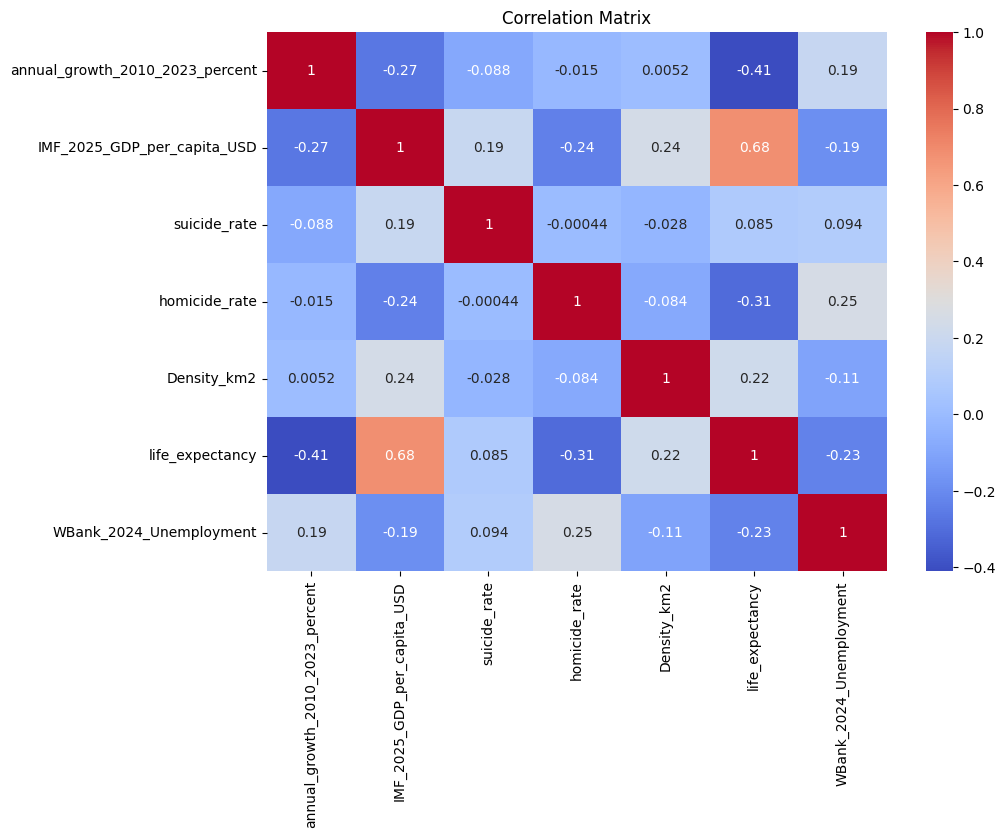

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## **Scatterplots**

### **Life Expectancy and Growth rates**

**Now let us actually visualize these correlations using scatterplots.**

In [ ]:
from IPython.display import display, Markdown, HTML

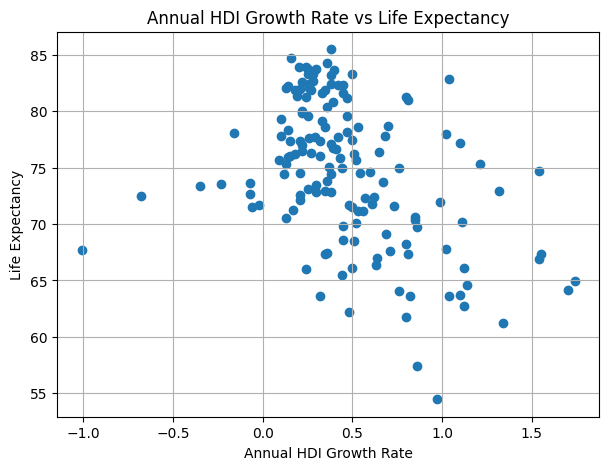

In [ ]:
import matplotlib.pyplot as plt

x = df_corr['annual_growth_2010_2023_percent']
y = df_corr['life_expectancy']

plt.figure(figsize=(7, 5))
plt.scatter(x, y)
plt.xlabel("Annual HDI Growth Rate")
plt.ylabel("Life Expectancy")
plt.title("Annual HDI Growth Rate vs Life Expectancy")
plt.grid()
plt.show()

From the above plot, we can see that countries with HDI growth rate between 0.0 and 0.5 have higher life expectancy- which suggests these are more developed and  stabilised countries.

We can also note the negative trend. From the clustered points between 0.0 and 0.5, data points get more scattered and life expectancy reduces.
We can also see two data points very close to growth rate of 1.0. One(at life expectancy<55) which is Nigeria and another (at life expectancy >80) which is UAE. This suggests how two growing countries do not have the efficient healthcare or environments leading to longer life.

We can also note that while countries with higher life expectancy have stable growth(0.0 to 0.5), the countries having higher growth rate do not necessarily have lower life expectancy. Instead they have higher range of health outcomes.

By observing the scattered nature of the plot, we can say this data is ***linearly separable***.

**Now let us find answers to some questions.**

In [ ]:
outliers_high_growth = df.loc[(df['annual_growth_2010_2023_percent'] > 0.9) &
                              (df['annual_growth_2010_2023_percent'] < 1.1)]

display(Markdown('''
### Which countries have HDI growth rate between 0.9 and 1.1?
'''))
outliers_high_growth


### Which countries have HDI growth rate between 0.9 and 1.1?


,country_or_territory,annual_growth_2010_2023_percent,Density_km2,homicide_rate,life_expectancy,suicide_rate,IMF_2025_GDP_per_capita_USD,WBank_2024_Unemployment
15,United Arab Emirates,1.04,155.0,0.752,82.91,1.7,51348,2.1
16,Mozambique,1.04,44.0,3.573,63.61,10.6,690,3.5
17,China,1.02,151.0,0.502,77.95,8.9,13806,4.6
18,Rwanda,1.02,578.0,3.590,67.78,8.7,1043,12.0
19,India,0.99,488.0,2.832,72.00,12.6,2818,4.2
20,Nigeria,0.97,255.0,21.741,54.46,5.0,1200,3.0


In [ ]:
display(Markdown('''
###Which countries have negative growth rate?
'''))
negative_growth = df[df['annual_growth_2010_2023_percent']<0.0]
negative_growth


###Which countries have negative growth rate?


,country_or_territory,annual_growth_2010_2023_percent,Density_km2,homicide_rate,life_expectancy,suicide_rate,IMF_2025_GDP_per_capita_USD,WBank_2024_Unemployment
145,Samoa,-0.02,78.0,6.199,71.70,12.0,5887,4.600000
146,Jamaica,-0.06,262.0,49.299,71.48,1.7,8405,4.900000
147,Saint Lucia,-0.07,295.0,36.696,72.70,5.3,14647,10.900000
148,Suriname,-0.07,4.0,7.281,73.63,22.3,6843,7.300000
149,Cuba,-0.16,89.0,4.418,78.08,13.8,18329,1.500000
150,Belize,-0.23,18.0,27.882,73.57,4.2,7897,7.000000
151,Ukraine,-0.35,65.0,3.843,73.42,21.2,6382,6.902013
152,Venezuela,-0.68,32.0,12.607,72.51,8.6,3103,5.500000
153,Timor-Leste,-1.01,94.0,4.064,67.69,3.6,1508,1.600000


In [ ]:
display(Markdown('''
### Which countries have highest Life Expectancy?
'''))
df.nlargest(5, 'life_expectancy')


### Which countries have highest Life Expectancy?


,country_or_territory,annual_growth_2010_2023_percent,Density_km2,homicide_rate,life_expectancy,suicide_rate,IMF_2025_GDP_per_capita_USD,WBank_2024_Unemployment
79,Hong Kong,0.38,7062.0,0.401,85.51,12.3,56844,2.8
132,Japan,0.16,340.0,0.230,84.71,17.4,34713,2.6
85,South Korea,0.36,530.0,0.480,84.33,27.5,35962,2.6
115,Switzerland,0.24,226.0,0.597,83.95,14.0,111047,4.1
127,Australia,0.20,3.5,0.854,83.92,13.1,65946,4.1


In [ ]:
display(Markdown('''
### Which countries have lowest Life Expectancy?
'''))
df.nsmallest(5, 'life_expectancy')


### Which countries have lowest Life Expectancy?


,country_or_territory,annual_growth_2010_2023_percent,Density_km2,homicide_rate,life_expectancy,suicide_rate,IMF_2025_GDP_per_capita_USD,WBank_2024_Unemployment
20,Nigeria,0.97,255.0,21.741,54.46,5.0,1200,3.0
22,Lesotho,0.86,77.0,37.694,57.38,28.7,1001,16.1
6,Niger,1.34,21.0,4.389,61.18,4.5,789,0.4
31,Sierra Leone,0.80,120.0,2.137,61.79,6.1,980,3.1
59,Liberia,0.48,58.0,3.117,62.16,6.0,904,2.9


In [ ]:
display(Markdown('''
### Which countries have high HDI growth and high life Expectancy as well?
'''))
high_growth_life = df.loc[(df['annual_growth_2010_2023_percent'] > 0.95) & (df['life_expectancy'] > 70)]
high_growth_life


### Which countries have high HDI growth and high life Expectancy as well?


,country_or_territory,annual_growth_2010_2023_percent,Density_km2,homicide_rate,life_expectancy,suicide_rate,IMF_2025_GDP_per_capita_USD,WBank_2024_Unemployment
4,Bangladesh,1.54,1333.0,2.340,74.67,2.8,2734,4.7
7,Bhutan,1.32,21.0,2.460,72.97,4.9,4285,2.9
8,Morocco,1.21,53.0,1.705,75.31,2.9,4763,8.9
12,Guyana,1.11,4.2,16.198,70.18,24.8,31378,10.2
14,Turkey,1.10,114.0,3.228,77.16,2.7,18198,8.4
15,United Arab Emirates,1.04,155.0,0.752,82.91,1.7,51348,2.1
17,China,1.02,151.0,0.502,77.95,8.9,13806,4.6
19,India,0.99,488.0,2.832,72.00,12.6,2818,4.2


In [ ]:
display(Markdown('''
### Which countries have low HDI growth and low life Expectancy as well?
'''))
low_growth_life = df.loc[(df['annual_growth_2010_2023_percent'] < 0.5) & (df['life_expectancy'] < 70)]
low_growth_life


### Which countries have low HDI growth and low life Expectancy as well?


,country_or_territory,annual_growth_2010_2023_percent,Density_km2,homicide_rate,life_expectancy,suicide_rate,IMF_2025_GDP_per_capita_USD,WBank_2024_Unemployment
59,Liberia,0.48,58.0,3.117,62.16,6.0,904,2.9
65,Bolivia,0.45,11.0,4.369,68.58,4.2,4585,3.1
66,Philippines,0.45,389.0,4.316,69.83,3.5,4321,2.2
68,Ghana,0.44,151.0,1.813,65.50,5.3,3193,3.0
87,Namibia,0.36,3.7,12.450,67.39,8.6,4816,19.1
88,Fiji,0.35,51.0,2.173,67.32,8.3,6825,4.3
96,Burundi,0.32,547.0,5.824,63.65,7.7,486,0.9
116,Afghanistan,0.24,65.0,4.022,66.03,3.6,417,13.3
153,Timor-Leste,-1.01,94.0,4.064,67.69,3.6,1508,1.6


### **Life Expectancy and GDP**

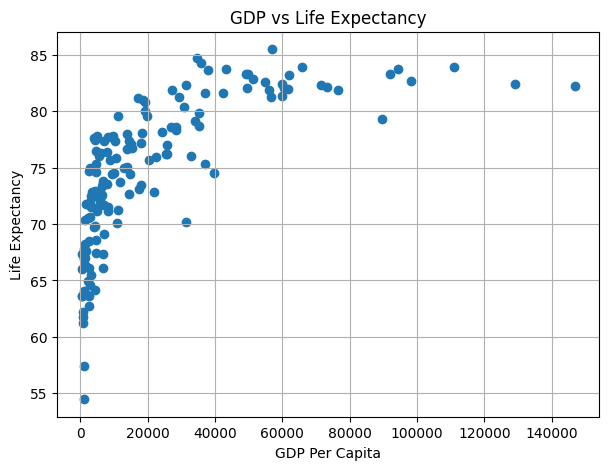

In [ ]:
x = df_corr['IMF_2025_GDP_per_capita_USD']
y = df_corr['life_expectancy']

plt.figure(figsize=(7, 5))
plt.scatter(x, y)
plt.xlabel("GDP Per Capita")
plt.ylabel("Life Expectancy")
plt.title("GDP vs Life Expectancy")
plt.grid()
plt.show()

**Let us interpret the above graph.**

We can see that there is an exponential relationship between GDP/capita and Life Expectancy. Small increases in wealth can lead to massive jumps in life expectancy.

Wealthier countries tend to live longer but only up to a point, then wealth increases and lifespan stabilizes.

Vertical Stack at the left side(GDP/capita < 10000USD) shows that countries with lower GDP can have variable health outcomes, indicating that a relatively poor country(than wealthier ones) may still have a relatively higher life expectancy(than the less wealhty ones with same GDP/capita).

There's huge variance in between GDP/capita 20k and 40k. In this zone, you might find countries that have grown their economies rapidly but are still "catching up" on the social infrastructure (healthcare, environmental regulations) required to reach the top-tier life expectancy levels.

The GDP vs. Life Expectancy plot confirms a non-linear relationship. While wealth is a powerful catalyst for health in developing nations, it reaches a point of diminishing returns in developed nations, where life expectancy stabilizes regardless of further increases in GDP per capita.

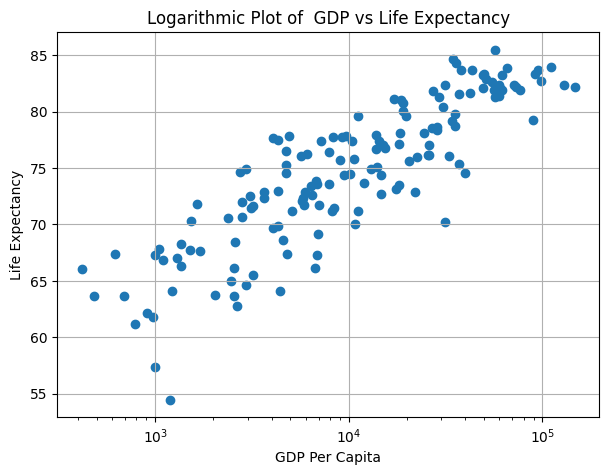

In [ ]:
x = df_corr['IMF_2025_GDP_per_capita_USD']
y = df_corr['life_expectancy']

plt.figure(figsize=(7, 5))
plt.scatter(x, y)
plt.xscale('log')
plt.xlabel("GDP Per Capita")
plt.ylabel("Life Expectancy")
plt.title("Logarithmic Plot of  GDP vs Life Expectancy")
plt.grid()
plt.show()

The above logarithmic graph helps us visualize a linear correlation between GDP per capita and Life Expectancy. It validates the insights we'd drawn using previous plot.

**Now let us answer some questions.**

In [ ]:
display(Markdown('''
### Which countries have the highest GDP per capita?
'''))
df.nlargest(5, 'IMF_2025_GDP_per_capita_USD')


### Which countries have the highest GDP per capita?


,country_or_territory,annual_growth_2010_2023_percent,Density_km2,homicide_rate,life_expectancy,suicide_rate,IMF_2025_GDP_per_capita_USD,WBank_2024_Unemployment
135,Luxembourg,0.14,261.0,1.544,82.23,8.2,146818,5.9
81,Ireland,0.38,76.0,0.654,82.41,8.5,129132,4.4
115,Switzerland,0.24,226.0,0.597,83.95,14.0,111047,4.1
102,Iceland,0.28,3.9,1.073,82.69,11.9,98150,3.1
111,Singapore,0.25,8290.0,0.069,83.74,8.1,94481,3.2


In [ ]:
display(Markdown('''
### Which countries have the lowest GDP per capita?
'''))
df.nsmallest(5, 'IMF_2025_GDP_per_capita_USD')


### Which countries have the lowest GDP per capita?


,country_or_territory,annual_growth_2010_2023_percent,Density_km2,homicide_rate,life_expectancy,suicide_rate,IMF_2025_GDP_per_capita_USD,WBank_2024_Unemployment
116,Afghanistan,0.24,65.0,4.022,66.03,3.6,417,13.3
96,Burundi,0.32,547.0,5.824,63.65,7.7,486,0.9
27,Malawi,0.81,230.0,1.791,67.35,7.6,622,5.0
16,Mozambique,1.04,44.0,3.573,63.61,10.6,690,3.5
6,Niger,1.34,21.0,4.389,61.18,4.5,789,0.4


In [ ]:
display(Markdown('''
### We can look at a data point between GDP 80k to 100k and life expectancy between 75 and 80. Which is this country?
'''))
df.loc[((df['life_expectancy']>75) & (df['life_expectancy']<80)) & ((df['IMF_2025_GDP_per_capita_USD'] > 80000) & (df['IMF_2025_GDP_per_capita_USD'] < 100000))]


### We can look at a data point between GDP 80k to 100k and life expectancy between 75 and 80. Which is this country?


,country_or_territory,annual_growth_2010_2023_percent,Density_km2,homicide_rate,life_expectancy,suicide_rate,IMF_2025_GDP_per_capita_USD,WBank_2024_Unemployment
142,United States,0.1,37.0,5.763,79.3,15.6,89599,4.1


In [ ]:
display(Markdown('''
### Which countries have GDP per capita less than 20k yet life expectancy more than 80?
'''))
df.loc[(df['life_expectancy']>80) & (df['IMF_2025_GDP_per_capita_USD']<20000)]


### Which countries have GDP per capita less than 20k yet life expectancy more than 80?


,country_or_territory,annual_growth_2010_2023_percent,Density_km2,homicide_rate,life_expectancy,suicide_rate,IMF_2025_GDP_per_capita_USD,WBank_2024_Unemployment
28,Maldives,0.81,1759.0,0.595,81.04,1.5,18684,4.6
61,Chile,0.47,27.0,6.348,81.17,7.7,17181,9.1
75,Costa Rica,0.39,100.0,17.745,80.80,8.1,19104,7.8
121,Oman,0.22,17.0,0.139,80.03,0.9,19119,3.2


### **Life Expectancy and Suicide Rates**

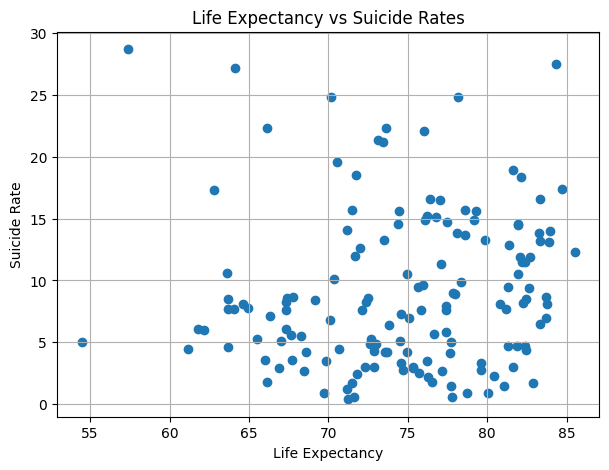

In [ ]:
x = df_corr['life_expectancy']
y = df_corr['suicide_rate']

plt.figure(figsize=(7, 5))
plt.scatter(x, y)
plt.xlabel("Life Expectancy")
plt.ylabel("Suicide Rate")
plt.title("Life Expectancy vs Suicide Rates")
plt.grid()
plt.show()

The above graph tells us something significant. We realize that increase in life expectancy does not necessarily lead to a lower suicide rate. This might say this creates a distinguishment between physical health and mental health, with countries with higher suicide rate facing mental health issues.

**Now let us answer some questions.**

In [ ]:
display(Markdown('''
### Which countries have the highest suicide rates?
'''))
df.nlargest(5, 'suicide_rate')


### Which countries have the highest suicide rates?


,country_or_territory,annual_growth_2010_2023_percent,Density_km2,homicide_rate,life_expectancy,suicide_rate,IMF_2025_GDP_per_capita_USD,WBank_2024_Unemployment
22,Lesotho,0.86,77.0,37.694,57.38,28.7,1001,16.1
85,South Korea,0.36,530.0,0.480,84.33,27.5,35962,2.6
2,Eswatini,1.70,72.0,12.665,64.12,27.2,4410,34.4
12,Guyana,1.11,4.2,16.198,70.18,24.8,31378,10.2
63,Uruguay,0.47,19.0,11.190,78.14,24.8,24380,8.4


In [ ]:
display(Markdown('''
### Which countries have the lowest suicide rates?
'''))
df.nsmallest(5, 'suicide_rate')


### Which countries have the lowest suicide rates?


,country_or_territory,annual_growth_2010_2023_percent,Density_km2,homicide_rate,life_expectancy,suicide_rate,IMF_2025_GDP_per_capita_USD,WBank_2024_Unemployment
131,Saint Vincent and the Grenadines,0.17,258.0,40.405,71.23,0.4,11132,18.1
34,Egypt,0.73,117.0,1.336,71.63,0.6,3191,7.2
143,Jordan,0.10,130.0,0.988,77.81,0.6,4908,18.0
21,São Tomé and Príncipe,0.86,245.0,3.225,69.72,0.9,4061,9.2
36,Saudi Arabia,0.70,16.0,0.795,78.73,0.9,35231,3.9


In [ ]:
display(Markdown('''
### Which countries have high life expectancy as well as high suicide rates?
'''))
df.loc[(df['life_expectancy']>75) & (df['suicide_rate']>15)]


### Which countries have high life expectancy as well as high suicide rates?


,country_or_territory,annual_growth_2010_2023_percent,Density_km2,homicide_rate,life_expectancy,suicide_rate,IMF_2025_GDP_per_capita_USD,WBank_2024_Unemployment
40,Thailand,0.65,140.0,4.813,76.41,16.6,7942,0.7
49,Croatia,0.53,69.0,0.769,78.58,15.7,26958,5.2
53,Latvia,0.51,30.0,2.497,76.19,15.2,25630,6.7
63,Uruguay,0.47,19.0,11.190,78.14,24.8,24380,8.4
76,Serbia,0.39,85.0,1.314,76.77,15.1,15322,7.4
85,South Korea,0.36,530.0,0.480,84.33,27.5,35962,2.6
93,Slovenia,0.33,105.0,0.566,81.60,18.9,37178,3.4
95,Lithuania,0.32,46.0,2.628,76.03,22.1,32982,7.5
103,France,0.28,122.0,1.335,83.33,16.6,49961,7.4
106,Belgium,0.26,385.0,1.077,82.11,18.4,60418,5.5


1. We can see some rather surprising results above. The countries listed above are all well developed or rather economically stable nations. However, as we've discussed before, developed countries usually have better reporting infrastructure and thus, cases do not go unreported.
2. Assuming accurate reporting, we can say that developed countries have higher life expectancy because of better healthcare facilities, but they tend to have higher suicide rates because of the societal structure, Individualism, performance pressure, weaker community ties and heavier workloads may lead to increased risk of suicide.

In [ ]:
display(Markdown('''
### Which countries have low life expectancy as well as low suicide rates?
'''))
df.loc[(df['life_expectancy']<70) & (df['suicide_rate']<10)]


### Which countries have low life expectancy as well as low suicide rates?


,country_or_territory,annual_growth_2010_2023_percent,Density_km2,homicide_rate,life_expectancy,suicide_rate,IMF_2025_GDP_per_capita_USD,WBank_2024_Unemployment
0,Haiti,1.74,427.0,41.152,64.94,7.8,2461,15.1
3,Ethiopia,1.55,117.0,8.632,67.31,6.1,994,3.4
5,Myanmar,1.54,84.0,3.872,66.89,2.9,1097,3.0
6,Niger,1.34,21.0,4.389,61.18,4.5,789,0.4
9,Angola,1.14,30.0,4.102,64.62,8.1,2931,14.5
11,Papua New Guinea,1.12,23.0,9.402,66.13,1.8,2555,2.7
13,Cameroon,1.10,62.0,4.537,63.70,8.5,2027,57.0
18,Rwanda,1.02,578.0,3.590,67.78,8.7,1043,12.0
20,Nigeria,0.97,255.0,21.741,54.46,5.0,1200,3.0
21,São Tomé and Príncipe,0.86,245.0,3.225,69.72,0.9,4061,9.2


From the above list of countries, we should make some considerations.
1. Some of the above listed countries are underdeveloped, or in early developing stages. They often have ineffiecient reporting infrastructure, leading to seemingly less suicide rate. They also have weaker public healthcare infrastructure, leading to lower life expectancy.
2. In middle-income countries with relatively stable institutions, lower suicide rates are more plausibly explained by social and cultural dynamics rather than data limitations. Community cohesion, family support structures, and differing societal pressures may reduce social isolation and buffer psychological stress, highlighting that mental health outcomes are not determined by economic status alone.


In [ ]:
display(Markdown('''
### Which countries have high life expectancy and low suicide rates?
'''))
df.loc[(df['life_expectancy']>75) & (df['suicide_rate']<10)]


### Which countries have high life expectancy and low suicide rates?


,country_or_territory,annual_growth_2010_2023_percent,Density_km2,homicide_rate,life_expectancy,suicide_rate,IMF_2025_GDP_per_capita_USD,WBank_2024_Unemployment
8,Morocco,1.21,53.0,1.705,75.31,2.9,4763,8.9
14,Turkey,1.10,114.0,3.228,77.16,2.7,18198,8.4
15,United Arab Emirates,1.04,155.0,0.752,82.91,1.7,51348,2.1
17,China,1.02,151.0,0.502,77.95,8.9,13806,4.6
28,Maldives,0.81,1759.0,0.595,81.04,1.5,18684,4.6
30,Bahrain,0.80,2034.0,0.204,81.28,4.7,29253,1.1
36,Saudi Arabia,0.70,16.0,0.795,78.73,0.9,35231,3.9
38,Bosnia and Herzegovina,0.68,62.0,1.224,77.85,9.0,9648,10.7
51,Armenia,0.52,104.0,2.186,75.68,2.5,8969,13.3
56,Malta,0.50,1686.0,0.563,83.30,6.5,49277,2.7


In [ ]:
display(Markdown('''
### Which countries have low life expectancy and high suicide rates?
'''))
df.loc[(df['life_expectancy']<70) & (df['suicide_rate']>15)]


### Which countries have low life expectancy and high suicide rates?


,country_or_territory,annual_growth_2010_2023_percent,Density_km2,homicide_rate,life_expectancy,suicide_rate,IMF_2025_GDP_per_capita_USD,WBank_2024_Unemployment
2,Eswatini,1.70,72.0,12.665,64.12,27.2,4410,34.4
10,Zimbabwe,1.12,43.0,6.760,62.77,17.3,2656,8.6
22,Lesotho,0.86,77.0,37.694,57.38,28.7,1001,16.1
58,South Africa,0.50,53.0,45.534,66.14,22.3,6667,33.2


### **Unemployment and Homicide Rate**

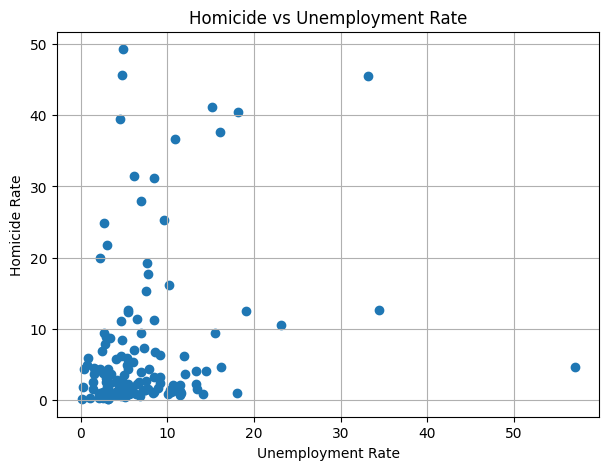

In [ ]:
y = df_corr['homicide_rate']
x = df_corr['WBank_2024_Unemployment']

plt.figure(figsize=(7, 5))
plt.scatter(x, y)
plt.ylabel("Homicide Rate")
plt.xlabel("Unemployment Rate")
plt.title("Homicide vs Unemployment Rate")
plt.grid()
plt.show()

From the above graph we can see huge cluster of countries which have both unemployment and homicide rates within 10. This suggests that maximum countries have minimum unemplyment and homicide rates. However, we can see, when unemployment is less than 20, there are several countries which have high homicide rates(>20).

This suggests that unemployment does not necessarily lead to homicides, but instead there're countries which have less unemployment but higher homicide, maybe because of organized crimes, weak government, civil unrest, etc.

We can see an outlier country which have very high unemployment(>50). Even with high unemployment, this country has low homicide rate(<10).

**Now let us answer some questions.**

In [ ]:
display(Markdown(
    '''###Which countries have the highest homicide rate?'''
))
df.nlargest(7, 'homicide_rate')

###Which countries have the highest homicide rate?

,country_or_territory,annual_growth_2010_2023_percent,Density_km2,homicide_rate,life_expectancy,suicide_rate,IMF_2025_GDP_per_capita_USD,WBank_2024_Unemployment
146,Jamaica,-0.06,262.0,49.299,71.48,1.7,8405,4.9
94,Ecuador,0.32,73.0,45.723,77.39,7.6,7210,4.8
58,South Africa,0.50,53.0,45.534,66.14,22.3,6667,33.2
0,Haiti,1.74,427.0,41.152,64.94,7.8,2461,15.1
131,Saint Vincent and the Grenadines,0.17,258.0,40.405,71.23,0.4,11132,18.1
97,Trinidad and Tobago,0.30,294.0,39.516,73.49,13.3,18121,4.5
22,Lesotho,0.86,77.0,37.694,57.38,28.7,1001,16.1


Observe how there're more countries in the above list who have high unemployment as well as high homicide rate than countries which have high homicide rate but low unemployment rate.

In [ ]:
display(Markdown(
    '''###Which countries have the lowest homicide rate?'''
))
df.nsmallest(7, 'homicide_rate')

###Which countries have the lowest homicide rate?

,country_or_territory,annual_growth_2010_2023_percent,Density_km2,homicide_rate,life_expectancy,suicide_rate,IMF_2025_GDP_per_capita_USD,WBank_2024_Unemployment
111,Singapore,0.25,8290.0,0.069,83.74,8.1,94481,3.2
67,Qatar,0.45,265.0,0.074,82.37,4.7,71441,0.1
121,Oman,0.22,17.0,0.139,80.03,0.9,19119,3.2
30,Bahrain,0.80,2034.0,0.204,81.28,4.7,29253,1.1
132,Japan,0.16,340.0,0.230,84.71,17.4,34713,2.6
86,Kuwait,0.36,277.0,0.252,80.41,2.3,30805,2.1
47,Indonesia,0.56,150.0,0.307,71.15,1.2,5074,3.3


Similarly, all above countries have low unemployment and low homicide rates.

In [ ]:
display(Markdown(
    '''###Which countries have the highest unemployment rate?'''
))
df.nlargest(7, 'WBank_2024_Unemployment')

###Which countries have the highest unemployment rate?

,country_or_territory,annual_growth_2010_2023_percent,Density_km2,homicide_rate,life_expectancy,suicide_rate,IMF_2025_GDP_per_capita_USD,WBank_2024_Unemployment
13,Cameroon,1.10,62.0,4.537,63.70,8.5,2027,57.0
2,Eswatini,1.70,72.0,12.665,64.12,27.2,4410,34.4
58,South Africa,0.50,53.0,45.534,66.14,22.3,6667,33.2
37,Botswana,0.69,4.4,10.547,69.16,8.4,6943,23.1
87,Namibia,0.36,3.7,12.450,67.39,8.6,4816,19.1
131,Saint Vincent and the Grenadines,0.17,258.0,40.405,71.23,0.4,11132,18.1
143,Jordan,0.10,130.0,0.988,77.81,0.6,4908,18.0


In [ ]:
display(Markdown(
    '''###Which countries have the lowest unemployment rate?'''
))
df.nsmallest(7, 'WBank_2024_Unemployment')

###Which countries have the lowest unemployment rate?

,country_or_territory,annual_growth_2010_2023_percent,Density_km2,homicide_rate,life_expectancy,suicide_rate,IMF_2025_GDP_per_capita_USD,WBank_2024_Unemployment
67,Qatar,0.45,265.0,0.074,82.37,4.7,71441,0.1
23,Cambodia,0.85,100.0,1.839,70.67,4.5,2812,0.3
6,Niger,1.34,21.0,4.389,61.18,4.5,789,0.4
40,Thailand,0.65,140.0,4.813,76.41,16.6,7942,0.7
96,Burundi,0.32,547.0,5.824,63.65,7.7,486,0.9
30,Bahrain,0.80,2034.0,0.204,81.28,4.7,29253,1.1
45,Vietnam,0.60,303.0,1.537,74.59,7.3,4745,1.4


In [ ]:
display(Markdown(
    '''###Which countries have high unemployment rate and high homicide rate?'''
))
df.loc[(df['WBank_2024_Unemployment'] > 12) & (df['homicide_rate'] > 12)]

###Which countries have high unemployment rate and high homicide rate?

,country_or_territory,annual_growth_2010_2023_percent,Density_km2,homicide_rate,life_expectancy,suicide_rate,IMF_2025_GDP_per_capita_USD,WBank_2024_Unemployment
0,Haiti,1.74,427.0,41.152,64.94,7.8,2461,15.1
2,Eswatini,1.70,72.0,12.665,64.12,27.2,4410,34.4
22,Lesotho,0.86,77.0,37.694,57.38,28.7,1001,16.1
58,South Africa,0.50,53.0,45.534,66.14,22.3,6667,33.2
87,Namibia,0.36,3.7,12.450,67.39,8.6,4816,19.1
131,Saint Vincent and the Grenadines,0.17,258.0,40.405,71.23,0.4,11132,18.1


In [ ]:
display(Markdown(
    '''###Which countries have high unemployment rate and low homicide rate?'''
))
df.loc[(df['WBank_2024_Unemployment'] > 12) & (df['homicide_rate'] < 10)]

###Which countries have high unemployment rate and low homicide rate?

,country_or_territory,annual_growth_2010_2023_percent,Density_km2,homicide_rate,life_expectancy,suicide_rate,IMF_2025_GDP_per_capita_USD,WBank_2024_Unemployment
9,Angola,1.14,30.0,4.102,64.62,8.1,2931,14.5
13,Cameroon,1.10,62.0,4.537,63.70,8.5,2027,57.0
46,Iraq,0.57,106.0,9.410,72.32,3.0,5832,15.5
51,Armenia,0.52,104.0,2.186,75.68,2.5,8969,13.3
77,Montenegro,0.38,47.0,0.789,77.09,11.3,14986,14.1
116,Afghanistan,0.24,65.0,4.022,66.03,3.6,417,13.3
117,Tunisia,0.22,79.0,4.621,76.51,1.8,4752,16.2
124,North Macedonia,0.21,72.0,1.529,77.39,5.8,10378,13.4
143,Jordan,0.10,130.0,0.988,77.81,0.6,4908,18.0


In [ ]:
display(Markdown(
    '''###Which countries have low unemployment rate but high homicide rate?'''
))
df.loc[(df['WBank_2024_Unemployment'] < 10) & (df['homicide_rate'] > 12)]

###Which countries have low unemployment rate but high homicide rate?

,country_or_territory,annual_growth_2010_2023_percent,Density_km2,homicide_rate,life_expectancy,suicide_rate,IMF_2025_GDP_per_capita_USD,WBank_2024_Unemployment
20,Nigeria,0.97,255.0,21.741,54.46,5.0,1200,3.0
39,Dominican Republic,0.67,237.0,12.370,73.72,4.2,11919,5.5
70,Brazil,0.43,25.0,19.275,75.85,7.6,10578,7.6
75,Costa Rica,0.39,100.0,17.745,80.80,8.1,19104,7.8
82,Honduras,0.38,97.0,31.442,72.88,3.0,3637,6.1
83,Mexico,0.37,67.0,24.859,75.07,7.0,13967,2.7
94,Ecuador,0.32,73.0,45.723,77.39,7.6,7210,4.8
97,Trinidad and Tobago,0.30,294.0,39.516,73.49,13.3,18121,4.5
101,Colombia,0.29,48.0,25.269,77.72,5.0,8249,9.6
123,Bahamas,0.21,40.0,31.221,74.55,3.3,39726,8.5


The countries listed in the above result are the ones which we had seen in the plot- the ones who have low unemployment yet high homicide rates.

 An important regional pattern emerges from the results: with the exception of Nigeria, the countries exhibiting low unemployment alongside high homicide rates are overwhelmingly concentrated in Latin America and the Caribbean. This suggests that homicide in these contexts is shaped less by labor market conditions and more by region-specific structural factors, including organized crime, illicit economies, high inequality, and institutional weaknesses.


What we can also note is that, the countries which have high the **lowest** homicide rates, also have **low** unemployment rates.
Similarly countries which tend to have high unemployment can possibly have high homicide rates too.


There're a lot of countries in Latin America which have low unemployment yet high homicide rates. By the above observation, we might say that Latin America is an outlier region having comparatively high homicide rates?

To find out if unemployment really leads to higher homicide rates, let visualize the plot again but this time, excluding countries from Latin America.

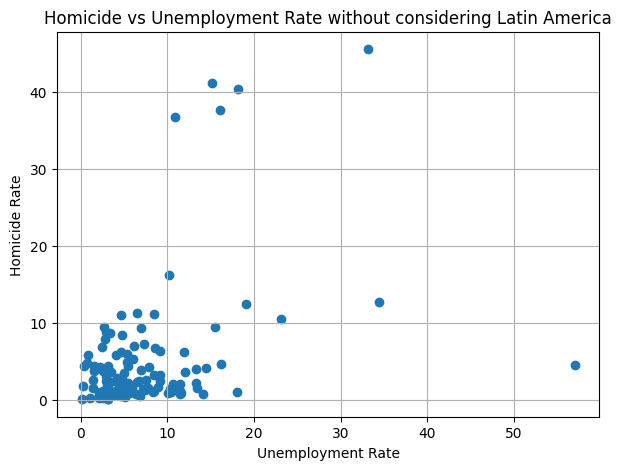

In [ ]:
df_corr_no_latam = df.loc[~((df['WBank_2024_Unemployment'] < 10) & (df['homicide_rate'] > 12))] #latam means Latin America
y = df_corr_no_latam['homicide_rate']
x = df_corr_no_latam['WBank_2024_Unemployment']

plt.figure(figsize=(7, 5))
plt.scatter(x, y)
plt.ylabel("Homicide Rate")
plt.xlabel("Unemployment Rate")
plt.title("Homicide vs Unemployment Rate without considering Latin America")
plt.grid()
plt.show()

The above graph helps us confiedently say that Unemployment and Homicide Rates are mainly unrelated if we do not consider outliers.

Loss of High-Homicide Points: The most extreme vertical outliers (those with homicide rates between 20 and 50) largely disappear. This aligns with global statistics showing that while Latin America has only 8% of the world's population, it accounts for roughly 33% of global homicides.

###**Some more interesting plots**

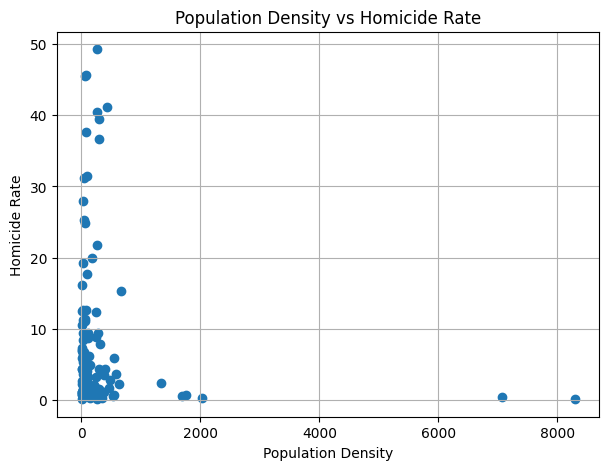

In [ ]:
x = df_corr['Density_km2']
y = df_corr['homicide_rate']

plt.figure(figsize=(7, 5))
plt.scatter(x, y)
plt.xlabel("Population Density")
plt.ylabel("Homicide Rate")
plt.title("Population Density vs Homicide Rate")
plt.grid()
plt.show()

**The above graph does not seems to give us much of an information, we need to scale it.**

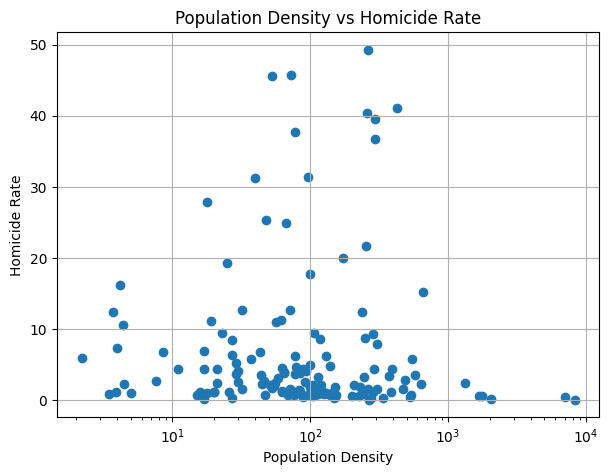

In [ ]:
x = df_corr['Density_km2']
y = df_corr['homicide_rate']

plt.figure(figsize=(7, 5))
plt.scatter(x, y)
plt.xscale("log")
plt.xlabel("Population Density")
plt.ylabel("Homicide Rate")
plt.title("Population Density vs Homicide Rate")
plt.grid()
plt.show()

Using a logarithmic scale for population density reveals that homicide rates remain low across a wide range of high-density countries. Elevated homicide rates are concentrated in moderately dense regions, suggesting that higher population density need not result in violent crime, and institutional or socio-economic factors likely dominate.

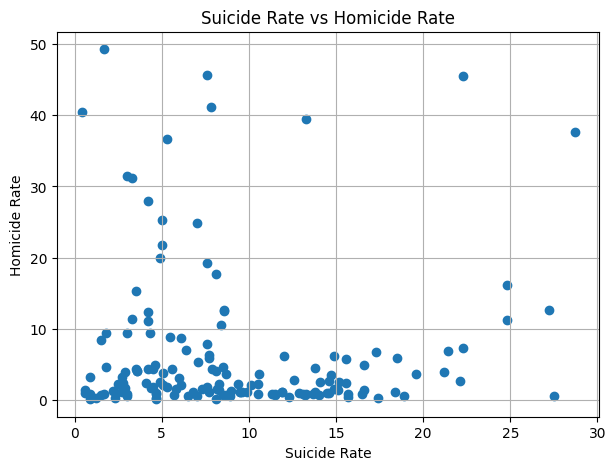

In [ ]:
x = df_corr['suicide_rate']
y = df_corr['homicide_rate']

plt.figure(figsize=(7, 5))
plt.scatter(x, y)
plt.xlabel("Suicide Rate")
plt.ylabel("Homicide Rate")
plt.title("Suicide Rate vs Homicide Rate")
plt.grid()
plt.show()

In [ ]:
display(Markdown(
    '''### Which countries have high Homicide Rates as well as Suicide Rates?'''
))
df.loc[(df['homicide_rate']>12) & (df['suicide_rate']>12)]

### Which countries have high Homicide Rates as well as Suicide Rates?

,country_or_territory,annual_growth_2010_2023_percent,Density_km2,homicide_rate,life_expectancy,suicide_rate,IMF_2025_GDP_per_capita_USD,WBank_2024_Unemployment
2,Eswatini,1.70,72.0,12.665,64.12,27.2,4410,34.4
12,Guyana,1.11,4.2,16.198,70.18,24.8,31378,10.2
22,Lesotho,0.86,77.0,37.694,57.38,28.7,1001,16.1
58,South Africa,0.50,53.0,45.534,66.14,22.3,6667,33.2
97,Trinidad and Tobago,0.30,294.0,39.516,73.49,13.3,18121,4.5


In [ ]:
display(Markdown(
    '''### Which countries have low Homicide Rate as well as low Suicide Rates?'''
))
df.loc[(df['homicide_rate']<10) & (df['suicide_rate']<10)]

### Which countries have low Homicide Rate as well as low Suicide Rates?

,country_or_territory,annual_growth_2010_2023_percent,Density_km2,homicide_rate,life_expectancy,suicide_rate,IMF_2025_GDP_per_capita_USD,WBank_2024_Unemployment
3,Ethiopia,1.55,117.0,8.632,67.31,6.1,994,3.4
4,Bangladesh,1.54,1333.0,2.340,74.67,2.8,2734,4.7
5,Myanmar,1.54,84.0,3.872,66.89,2.9,1097,3.0
6,Niger,1.34,21.0,4.389,61.18,4.5,789,0.4
7,Bhutan,1.32,21.0,2.460,72.97,4.9,4285,2.9
...,...,...,...,...,...,...,...,...
137,Romania,0.14,83.0,1.109,75.94,9.6,22436,5.4
138,Brunei,0.13,88.0,0.486,75.33,3.0,37020,5.1
143,Jordan,0.10,130.0,0.988,77.81,0.6,4908,18.0
144,Bulgaria,0.09,62.0,1.088,75.64,9.5,20426,4.1


In [ ]:
display(Markdown(
    '''### Which countries have high Homicide Rate but low Suicide Rates?'''
))
df.loc[(df['homicide_rate']>12) & (df['suicide_rate']<10)]

### Which countries have high Homicide Rate but low Suicide Rates?

,country_or_territory,annual_growth_2010_2023_percent,Density_km2,homicide_rate,life_expectancy,suicide_rate,IMF_2025_GDP_per_capita_USD,WBank_2024_Unemployment
0,Haiti,1.74,427.0,41.152,64.94,7.8,2461,15.1
20,Nigeria,0.97,255.0,21.741,54.46,5.0,1200,3.0
39,Dominican Republic,0.67,237.0,12.370,73.72,4.2,11919,5.5
70,Brazil,0.43,25.0,19.275,75.85,7.6,10578,7.6
75,Costa Rica,0.39,100.0,17.745,80.80,8.1,19104,7.8
82,Honduras,0.38,97.0,31.442,72.88,3.0,3637,6.1
83,Mexico,0.37,67.0,24.859,75.07,7.0,13967,2.7
87,Namibia,0.36,3.7,12.450,67.39,8.6,4816,19.1
94,Ecuador,0.32,73.0,45.723,77.39,7.6,7210,4.8
101,Colombia,0.29,48.0,25.269,77.72,5.0,8249,9.6


In [ ]:
display(Markdown(
    '''### Which countries have low Homicide Rate but high Suicide Rates?'''
))
df.loc[(df['homicide_rate']<10) & (df['suicide_rate']>12)]

### Which countries have low Homicide Rate but high Suicide Rates?

,country_or_territory,annual_growth_2010_2023_percent,Density_km2,homicide_rate,life_expectancy,suicide_rate,IMF_2025_GDP_per_capita_USD,WBank_2024_Unemployment
10,Zimbabwe,1.12,43.0,6.760,62.77,17.3,2656,8.600000
19,India,0.99,488.0,2.832,72.00,12.6,2818,4.200000
40,Thailand,0.65,140.0,4.813,76.41,16.6,7942,0.700000
49,Croatia,0.53,69.0,0.769,78.58,15.7,26958,5.200000
50,Moldova,0.53,92.0,2.543,71.20,14.1,8239,1.400000
53,Latvia,0.51,30.0,2.497,76.19,15.2,25630,6.700000
55,Vanuatu,0.50,27.0,0.321,71.48,15.7,3133,5.100000
57,Sri Lanka,0.50,373.0,3.427,77.48,14.7,4325,5.000000
60,Mongolia,0.48,2.2,5.915,71.73,18.5,7005,5.400000
76,Serbia,0.39,85.0,1.314,76.77,15.1,15322,7.400000


### **Answering some more interesting questions.**

In [ ]:
display(Markdown(
    '''###Which countries have high life expectancy and low suicide rates as well as low homicide rates?'''
))
df.loc[(df['life_expectancy']>70) & (df['homicide_rate']<10) & (df['suicide_rate']<10)]

###Which countries have high life expectancy and low suicide rates as well as low homicide rates?

,country_or_territory,annual_growth_2010_2023_percent,Density_km2,homicide_rate,life_expectancy,suicide_rate,IMF_2025_GDP_per_capita_USD,WBank_2024_Unemployment
4,Bangladesh,1.54,1333.0,2.340,74.67,2.8,2734,4.700000
7,Bhutan,1.32,21.0,2.460,72.97,4.9,4285,2.900000
8,Morocco,1.21,53.0,1.705,75.31,2.9,4763,8.900000
14,Turkey,1.10,114.0,3.228,77.16,2.7,18198,8.400000
15,United Arab Emirates,1.04,155.0,0.752,82.91,1.7,51348,2.100000
17,China,1.02,151.0,0.502,77.95,8.9,13806,4.600000
23,Cambodia,0.85,100.0,1.839,70.67,4.5,2812,0.300000
28,Maldives,0.81,1759.0,0.595,81.04,1.5,18684,4.600000
30,Bahrain,0.80,2034.0,0.204,81.28,4.7,29253,1.100000
34,Egypt,0.73,117.0,1.336,71.63,0.6,3191,7.200000


In [ ]:
display(Markdown(
    '''###Which countries have high gdp per capita, life expectancy and low suicide rates as well as low homicide rates?'''
))
df.loc[(df['IMF_2025_GDP_per_capita_USD']>10000) & (df['life_expectancy']>70) & (df['homicide_rate']<10) & (df['suicide_rate']<10)]

###Which countries have high gdp per capita, life expectancy and low suicide rates as well as low homicide rates?

,country_or_territory,annual_growth_2010_2023_percent,Density_km2,homicide_rate,life_expectancy,suicide_rate,IMF_2025_GDP_per_capita_USD,WBank_2024_Unemployment
14,Turkey,1.10,114.0,3.228,77.16,2.7,18198,8.400000
15,United Arab Emirates,1.04,155.0,0.752,82.91,1.7,51348,2.100000
17,China,1.02,151.0,0.502,77.95,8.9,13806,4.600000
28,Maldives,0.81,1759.0,0.595,81.04,1.5,18684,4.600000
30,Bahrain,0.80,2034.0,0.204,81.28,4.7,29253,1.100000
36,Saudi Arabia,0.70,16.0,0.795,78.73,0.9,35231,3.900000
48,Georgia,0.54,55.0,2.042,74.50,5.1,10126,11.500000
52,Turkmenistan,0.52,16.0,1.093,70.07,6.8,10801,4.300000
56,Malta,0.50,1686.0,0.563,83.30,6.5,49277,2.700000
61,Chile,0.47,27.0,6.348,81.17,7.7,17181,9.100000


In [ ]:
display(Markdown(
    '''###Which countries have low life expectancy and high suicide rates as well as high homicide rates?'''
))
df.loc[(df['life_expectancy']<70) & (df['homicide_rate']>12) & (df['suicide_rate']>12)]

###Which countries have low life expectancy and high suicide rates as well as high homicide rates?

,country_or_territory,annual_growth_2010_2023_percent,Density_km2,homicide_rate,life_expectancy,suicide_rate,IMF_2025_GDP_per_capita_USD,WBank_2024_Unemployment
2,Eswatini,1.70,72.0,12.665,64.12,27.2,4410,34.4
22,Lesotho,0.86,77.0,37.694,57.38,28.7,1001,16.1
58,South Africa,0.50,53.0,45.534,66.14,22.3,6667,33.2


In [ ]:
display(Markdown(
    '''###Which countries have low gdp per capita, life expectancy and high suicide rates as well as high homicide rates?'''
))
df.loc[(df['IMF_2025_GDP_per_capita_USD']<8000) & (df['life_expectancy']<70) & (df['homicide_rate']>12) & (df['suicide_rate']>12)]

###Which countries have low gdp per capita, life expectancy and high suicide rates as well as high homicide rates?

,country_or_territory,annual_growth_2010_2023_percent,Density_km2,homicide_rate,life_expectancy,suicide_rate,IMF_2025_GDP_per_capita_USD,WBank_2024_Unemployment
2,Eswatini,1.70,72.0,12.665,64.12,27.2,4410,34.4
22,Lesotho,0.86,77.0,37.694,57.38,28.7,1001,16.1
58,South Africa,0.50,53.0,45.534,66.14,22.3,6667,33.2


##**List of countries by:**

In [ ]:
import plotly.express as px

df_for_plot = df.reset_index()

fig = px.bar(df_for_plot,
             x='country_or_territory',
             y='annual_growth_2010_2023_percent',
             color='annual_growth_2010_2023_percent',
             hover_name='country_or_territory',
             title='HDI Growth by Country',
             labels={'Serial Number': 'Country Serial Number', 'HDI Growth by Country': 'PC1 Score'})

fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()

In [ ]:
import plotly.express as px

df_for_plot = df.reset_index()

fig = px.bar(df_for_plot,
             x='country_or_territory',
             y='Density_km2',
             color='Density_km2',
             hover_name='country_or_territory',
             title='Population Density by Country',
             labels={'Serial Number': 'Country Serial Number', 'Population Density by Country': 'PC1 Score'})

fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()

In [ ]:
import plotly.express as px

df_for_plot = df.reset_index()

fig = px.bar(df_for_plot,
             x='country_or_territory',
             y='annual_growth_2010_2023_percent',
             color='annual_growth_2010_2023_percent',
             hover_name='country_or_territory',
             title='HDI Growth by Country',
             labels={'Serial Number': 'Country Serial Number', 'HDI Growth by Country': 'PC1 Score'})

fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()

In [ ]:
import plotly.express as px

df_for_plot = df.reset_index()

fig = px.bar(df_for_plot,
             x='country_or_territory',
             y='homicide_rate',
             color='homicide_rate',
             hover_name='country_or_territory',
             title='Homicide Rate by Country',
             labels={'Serial Number': 'Country Serial Number', 'Homicide Rate by Country': 'PC1 Score'})

fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()

In [ ]:
import plotly.express as px

df_for_plot = df.reset_index()

fig = px.bar(df_for_plot,
             x='country_or_territory',
             y='suicide_rate',
             color='suicide_rate',
             hover_name='country_or_territory',
             title='Suicide Rate by Country',
             labels={'Serial Number': 'Country Serial Number', 'Suicide Rate by Country': 'PC1 Score'})

fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()

In [ ]:
import plotly.express as px

df_for_plot = df.reset_index()

fig = px.bar(df_for_plot,
             x='country_or_territory',
             y='life_expectancy',
             color='life_expectancy',
             hover_name='country_or_territory',
             title='Life Expectancy by Country',
             labels={'Serial Number': 'Country Serial Number', 'Life Expectancy by Country': 'PC1 Score'})

fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()

In [ ]:
import plotly.express as px

df_for_plot = df.reset_index()

fig = px.bar(df_for_plot,
             x='country_or_territory',
             y='IMF_2025_GDP_per_capita_USD',
             color='IMF_2025_GDP_per_capita_USD',
             hover_name='country_or_territory',
             title='GDP Per Capita by Country',
             labels={'Serial Number': 'Country Serial Number', 'GDP Per Capita by Country': 'PC1 Score'})

fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()

In [ ]:
import plotly.express as px

df_for_plot = df.reset_index()

fig = px.bar(df_for_plot,
             x='country_or_territory',
             y='WBank_2024_Unemployment',
             color='WBank_2024_Unemployment',
             hover_name='country_or_territory',
             title='Unemployment by Country',
             labels={'Serial Number': 'Country Serial Number', 'Unemployment by Country': 'PC1 Score'})

fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()

# **Dimensionality Reduction**

After having performed in depth Data Analysis, it seems a good idea to group the countries. However, we have 7 parameters, and some of them like suicide rate and population density are not much correlated to any other, while there's very strong correlation between GDP per capita and Life Expectancy.

Clustering directly on 7 parameters would give "double the weight" to the relationship between Wealth and Health (GDP and Life Expectancy) because they are so similar. Meanwhile, unique but "noisy" factors like population density might blur the boundaries between countries.

By performing PCA first, we condense those 7 parameters into a few Principal Components. This removes redundancy, captures the most important differences between countries, and allows K-Means to find more distinct, balanced groups.

## **PCA Initialization and Variance**

### **Finding the right number of PCs**

In [ ]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, 0 to 153
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   annual_growth_2010_2023_percent  151 non-null    float64
 1   IMF_2025_GDP_per_capita_USD      151 non-null    int64  
 2   suicide_rate                     151 non-null    float64
 3   homicide_rate                    151 non-null    float64
 4   Density_km2                      151 non-null    float64
 5   life_expectancy                  151 non-null    float64
 6   WBank_2024_Unemployment          151 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 9.4 KB


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_corr)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
df_pca = pca.fit_transform(df_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print(f"Variance explained by each component: {explained_variance}")
print(f"Cumulative variance: {cumulative_variance}")

Variance explained by each component: [0.32644099 0.16875605 0.1440336  0.13362932 0.10697379 0.08001126
 0.040155  ]
Cumulative variance: [0.32644099 0.49519704 0.63923064 0.77285996 0.87983375 0.959845
 1.        ]


By observation, we can note that the first 5 principal components capture 87.98% of variance(0.8798). It is a good practice to retain enough PCs to capture 80 to 90% of variance. Hence, we'll go forward with **5 PCs**.

##**Loadings**

###**Initialize**

We had decided **5 PCs**.

One must understand that every PC is orthogonal, in simple terms, they are completely independent from each other, not correlated at all.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
df_pca = pca.fit_transform(df_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print(f"Variance explained by each component: {explained_variance}")
print(f"Cumulative variance: {cumulative_variance}")
display(Markdown(
    '''For 5 principal components'''
))

Variance explained by each component: [0.32644099 0.16875605 0.1440336  0.13362932 0.10697379]
Cumulative variance: [0.32644099 0.49519704 0.63923064 0.77285996 0.87983375]


For 5 principal components

###**Let us understand loadings before we interpret it.**

A loading is a weight that tells you how much an original variable **contributes** to a principal component.

Positive loading = the **variable increases when the PC score increases**

So if:

GDP loading on PC1 = +0.60

Then:

Countries with high PC1 score → high GDP

Countries with low PC1 score → low GDP

Negative loading = the **variable decreases when the PC score increases.**

So if:

Homicide loading on PC1 = −0.25

Then:

High PC1 score → low homicide

Low PC1 score → high homicide

Near zero = the **variable has almost no role in that PC.**

So if:

Life expectancy loading on PC3 ≈ 0

Then:

PC3 does not care about life expectancy

Changing life expectancy barely moves PC3


Loadings are not correlations, nor do they tell whether a factor is good or bad. They only describe how **multiple** variables move together along a specific latent(**hidden**) pattern.

###**Loadings and Graphs**

Now, let us name the various PCs we've found by observing their loadings.

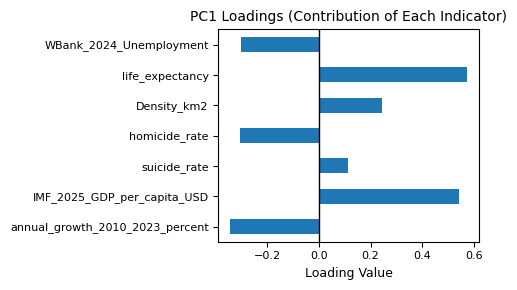

###PC1 — Overall Socio-Economic Development: Captures income, longevity, urbanisation, and low crime/unemployment.
        

In [ ]:
import matplotlib.pyplot as plt

loadings1 = pd.Series(pca.components_[0], index=df_corr.columns)

plt.figure(figsize=(5,3))
loadings1.plot(kind="barh")
plt.axvline(0, color="black", linewidth=1)
plt.title("PC1 Loadings (Contribution of Each Indicator)", fontsize=10)
plt.xlabel("Loading Value", fontsize=9)
plt.ylabel("", fontsize=9)
plt.tick_params(axis='both', labelsize=8)
plt.tight_layout()
plt.show()

display(Markdown(
    '''###PC1 — Overall Socio-Economic Development: Captures income, longevity, urbanisation, and low crime/unemployment.
        '''
))

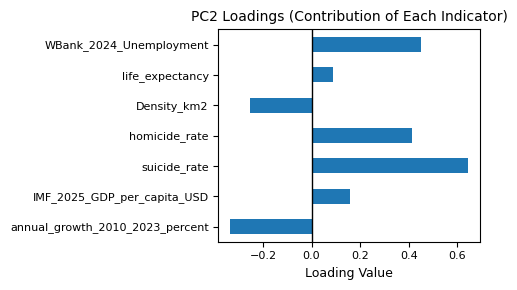

###PC2 — Social & Psychological Stress: Driven by suicide, unemployment, and internal social strain, independent of income. 

In [ ]:
import matplotlib.pyplot as plt

loadings2 = pd.Series(pca.components_[1], index=df_corr.columns)

plt.figure(figsize=(5,3))
loadings2.plot(kind="barh")
plt.axvline(0, color="black", linewidth=1)
plt.title("PC2 Loadings (Contribution of Each Indicator)", fontsize=10)
plt.xlabel("Loading Value", fontsize=9)
plt.ylabel("", fontsize=9)
plt.tick_params(axis='both', labelsize=8)
plt.tight_layout()
plt.show()

display(Markdown(
    '''###PC2 — Social & Psychological Stress: Driven by suicide, unemployment, and internal social strain, independent of income. '''
))

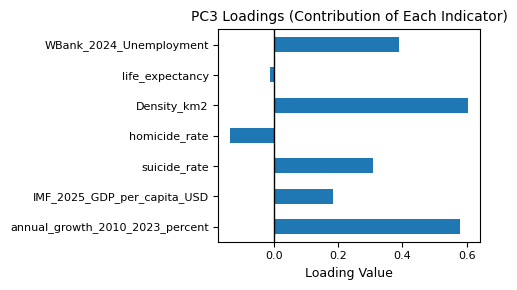

###PC3 — Urbanisation & Demographic Pressure: Reflects population density, growth, and labour-absorption pressure. 

In [ ]:
import matplotlib.pyplot as plt

loadings3 = pd.Series(pca.components_[2], index=df_corr.columns)

plt.figure(figsize=(5,3))
loadings3.plot(kind="barh")
plt.axvline(0, color="black", linewidth=1)
plt.title("PC3 Loadings (Contribution of Each Indicator)", fontsize=10)
plt.xlabel("Loading Value", fontsize=9)
plt.ylabel("", fontsize=9)
plt.tick_params(axis='both', labelsize=8)
plt.tight_layout()
plt.show()

display(Markdown(
    '''###PC3 — Urbanisation & Demographic Pressure: Reflects population density, growth, and labour-absorption pressure. '''
))

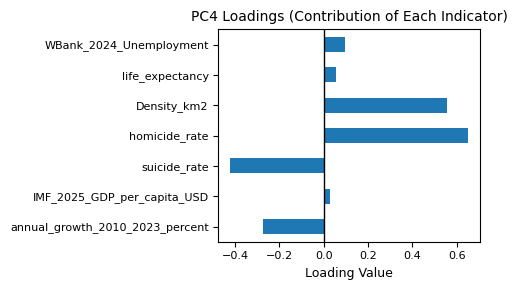

###PC4 — Violence vs Internal Distress: Contrasts outward violence (homicide) with inward mental-health stress (suicide). 

In [ ]:
import matplotlib.pyplot as plt

loadings4 = pd.Series(pca.components_[3], index=df_corr.columns)

plt.figure(figsize=(5,3))
loadings4.plot(kind="barh")
plt.axvline(0, color="black", linewidth=1)
plt.title("PC4 Loadings (Contribution of Each Indicator)", fontsize=10)
plt.xlabel("Loading Value", fontsize=9)
plt.ylabel("", fontsize=9)
plt.tick_params(axis='both', labelsize=8)
plt.tight_layout()
plt.show()

display(Markdown(
    '''###PC4 — Violence vs Internal Distress: Contrasts outward violence (homicide) with inward mental-health stress (suicide). '''
))

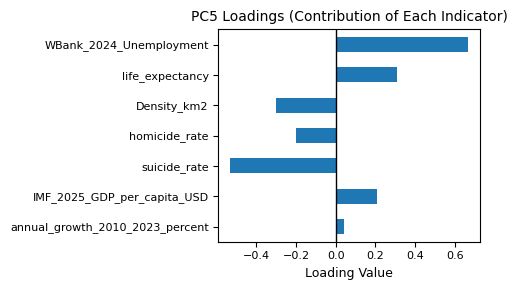

###PC5 — Employment–Health Trade-off: Separates labour-market weakness from strong health and safety outcomes. 

In [ ]:
import matplotlib.pyplot as plt

loadings5 = pd.Series(pca.components_[4], index=df_corr.columns)

plt.figure(figsize=(5,3))
loadings5.plot(kind="barh")
plt.axvline(0, color="black", linewidth=1)
plt.title("PC5 Loadings (Contribution of Each Indicator)", fontsize=10)
plt.xlabel("Loading Value", fontsize=9)
plt.ylabel("", fontsize=9)
plt.tick_params(axis='both', labelsize=8)
plt.tight_layout()
plt.show()

display(Markdown(
    '''###PC5 — Employment–Health Trade-off: Separates labour-market weakness from strong health and safety outcomes. '''
))

##**Creating final dataframe**

In [ ]:
print(f'Shape of df_pca: {df_pca.shape}\n')

pca_columns = ['Socio-Economic Development(PC1)',
               'Social Stress(PC2)',
               'Urban & Demographic Pressure(PC3)',
               'Violence vs Distress(PC4)',
               'Employment–Health Trade-off(PC5)']
df_pca = pd.DataFrame(data=df_pca, columns=pca_columns, index=df_corr.index)

print(df_pca.info())
df_pca.head()

Shape of df_pca: (151, 5)

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, 0 to 153
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Socio-Economic Development(PC1)    151 non-null    float64
 1   Social Stress(PC2)                 151 non-null    float64
 2   Urban & Demographic Pressure(PC3)  151 non-null    float64
 3   Violence vs Distress(PC4)          151 non-null    float64
 4   Employment–Health Trade-off(PC5)   151 non-null    float64
dtypes: float64(5)
memory usage: 7.1 KB
None


,Socio-Economic Development(PC1),Social Stress(PC2),Urban & Demographic Pressure(PC3),Violence vs Distress(PC4),Employment–Health Trade-off(PC5)
0,-3.718293,0.464544,1.771786,1.489353,-0.257988
2,-3.498171,2.781466,3.958310,-1.524173,0.671818
3,-1.986325,-1.535358,0.932411,-0.643465,-0.485990
4,-0.890224,-2.257494,1.721775,0.021931,0.006573
5,-1.920752,-2.070086,0.778127,-0.748889,-0.172320


In [ ]:
df_pca.insert(0, 'Countries', df['country_or_territory'])
print(df_pca.info())
df_pca.head()

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, 0 to 153
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Countries                          151 non-null    object 
 1   Socio-Economic Development(PC1)    151 non-null    float64
 2   Social Stress(PC2)                 151 non-null    float64
 3   Urban & Demographic Pressure(PC3)  151 non-null    float64
 4   Violence vs Distress(PC4)          151 non-null    float64
 5   Employment–Health Trade-off(PC5)   151 non-null    float64
dtypes: float64(5), object(1)
memory usage: 8.3+ KB
None


,Countries,Socio-Economic Development(PC1),Social Stress(PC2),Urban & Demographic Pressure(PC3),Violence vs Distress(PC4),Employment–Health Trade-off(PC5)
0,Haiti,-3.718293,0.464544,1.771786,1.489353,-0.257988
2,Eswatini,-3.498171,2.781466,3.958310,-1.524173,0.671818
3,Ethiopia,-1.986325,-1.535358,0.932411,-0.643465,-0.485990
4,Bangladesh,-0.890224,-2.257494,1.721775,0.021931,0.006573
5,Myanmar,-1.920752,-2.070086,0.778127,-0.748889,-0.172320


##**Performance of countries in Principal Components**

###**Specific Countries**

Add countries in the list `specific_countries_to_check `

In [ ]:
import plotly.express as px

specific_countries_to_check = ['Egypt','United States','China','India','Russia','Japan','France','Brazil','South Africa','Thailand']

filtered_pca_df = df_pca[df_pca['Countries'].isin(specific_countries_to_check)].reset_index()

fig = px.bar(filtered_pca_df,
             x='Countries',
             y='Socio-Economic Development(PC1)',
             color='Socio-Economic Development(PC1)', # Color by PC1 value
             title='Composite Socio-Economic Development Index (PC1) for Selected Countries',
             labels={'Socio-Economic Development Index (PC1)': 'PC1 Score'})

fig.update_layout(xaxis={'categoryorder':'total ascending'}) # Order by PC1 score
fig.show()

In [ ]:
import plotly.express as px

specific_countries_to_check = ['Egypt','United States','China','India','Russia','Japan','France','Brazil','South Africa','Thailand']

filtered_pca_df = df_pca[df_pca['Countries'].isin(specific_countries_to_check)].reset_index()

fig = px.bar(filtered_pca_df,
             x='Countries',
             y='Social Stress(PC2)',
             color='Social Stress(PC2)', # Color by PC1 value
             title='Social Stress(PC2) for Selected Countries',
             labels={'Social Stress(PC2)': 'PC2 Score'})

fig.update_layout(xaxis={'categoryorder':'total ascending'}) # Order by PC1 score
fig.show()

In [ ]:
import plotly.express as px

specific_countries_to_check = ['Egypt','United States','China','India','Russia','Japan','France','Brazil','South Africa','Thailand']

filtered_pca_df = df_pca[df_pca['Countries'].isin(specific_countries_to_check)].reset_index()

fig = px.bar(filtered_pca_df,
             x='Countries',
             y='Urban & Demographic Pressure(PC3)',
             color='Urban & Demographic Pressure(PC3)', # Color by PC1 value
             title='Urban & Demographic Pressure(PC3) for Selected Countries',
             labels={'Urban & Demographic Pressure(PC3)': 'PC3 Score'})

fig.update_layout(xaxis={'categoryorder':'total ascending'}) # Order by PC1 score
fig.show()

In [ ]:
import plotly.express as px

specific_countries_to_check = ['Egypt','United States','China','India','Russia','Japan','France','Brazil','South Africa','Thailand']

filtered_pca_df = df_pca[df_pca['Countries'].isin(specific_countries_to_check)].reset_index()

fig = px.bar(filtered_pca_df,
             x='Countries',
             y='Violence vs Distress(PC4)',
             color='Violence vs Distress(PC4)', # Color by PC1 value
             title='Violence vs Distress(PC4)) for Selected Countries',
             labels={'Violence vs Distress(PC4)': 'PC4 Score'})

fig.update_layout(xaxis={'categoryorder':'total ascending'}) # Order by PC1 score
fig.show()

In [ ]:
import plotly.express as px

specific_countries_to_check = ['Egypt','United States','China','India','Russia','Japan','France','Brazil','South Africa','Thailand']

filtered_pca_df = df_pca[df_pca['Countries'].isin(specific_countries_to_check)].reset_index()

fig = px.bar(filtered_pca_df,
             x='Countries',
             y='Employment–Health Trade-off(PC5)',
             color='Employment–Health Trade-off(PC5)', # Color by PC1 value
             title='Employment–Health Trade-off(PC5) for Selected Countries',
             labels={'Employment–Health Trade-off(PC5)': 'PC5 Score'})

fig.update_layout(xaxis={'categoryorder':'total ascending'}) # Order by PC1 score
fig.show()

###**All countries**

In [ ]:
import plotly.express as px

pca_df_for_plot = df_pca.reset_index()

fig = px.bar(pca_df_for_plot,
             x='Countries',
             y='Socio-Economic Development(PC1)',
             color='Socio-Economic Development(PC1)',
             hover_name='Countries',
             title='Composite Socio-Economic Development Index (PC1) by Country',
             labels={'Serial Number': 'Country Serial Number', 'Composite Socio-Economic Development Index (PC1)': 'PC1 Score'})

fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()

In [ ]:
import plotly.express as px

pca_df_for_plot = df_pca.reset_index()

fig = px.bar(pca_df_for_plot,
             x='Countries',
             y='Social Stress(PC2)',
             color='Social Stress(PC2)',
             hover_name='Countries',
             title='Social Stress(PC2) by Country',
             labels={'Serial Number': 'Country Serial Number', 'Social Stress(PC2)': 'PC2 Score'})

fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()

In [ ]:
import plotly.express as px

pca_df_for_plot = df_pca.reset_index()

fig = px.bar(pca_df_for_plot,
             x='Countries',
             y='Urban & Demographic Pressure(PC3)',
             color='Urban & Demographic Pressure(PC3)',
             hover_name='Countries',
             title='Urban & Demographic Pressure(PC3) by Country',
             labels={'Serial Number': 'Country Serial Number', 'Composite Urban & Demographic Pressure(PC3)': 'PC1 Score'})

fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()

In [ ]:
import plotly.express as px

pca_df_for_plot = df_pca.reset_index()

fig = px.bar(pca_df_for_plot,
             x='Countries',
             y='Violence vs Distress(PC4)',
             color='Violence vs Distress(PC4)',
             hover_name='Countries',
             title='Violence vs Distress(PC4) by Country',
             labels={'Serial Number': 'Country Serial Number', 'Violence vs Distress(PC4)': 'PC4 Score'})

fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()

In [ ]:
import plotly.express as px

pca_df_for_plot = df_pca.reset_index()

fig = px.bar(pca_df_for_plot,
             x='Countries',
             y='Employment–Health Trade-off(PC5)',
             color='Employment–Health Trade-off(PC5)',
             hover_name='Countries',
             title='Employment–Health Trade-off(PC5) by Country',
             labels={'Serial Number': 'Country Serial Number', 'Composite Employment–Health Trade-off(PC5)': 'PC1 Score'})

fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()

# **Clustering**

Now let us proceed with clustering, i.e grouping the countries into certain number of groups using silhouette scores.

In [ ]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, 0 to 153
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Countries                          151 non-null    object 
 1   Socio-Economic Development(PC1)    151 non-null    float64
 2   Social Stress(PC2)                 151 non-null    float64
 3   Urban & Demographic Pressure(PC3)  151 non-null    float64
 4   Violence vs Distress(PC4)          151 non-null    float64
 5   Employment–Health Trade-off(PC5)   151 non-null    float64
dtypes: float64(5), object(1)
memory usage: 8.3+ KB


In [ ]:
from sklearn.cluster import KMeans

X = df_pca[
    ['Socio-Economic Development(PC1)',
     'Social Stress(PC2)',
     'Urban & Demographic Pressure(PC3)',
     'Violence vs Distress(PC4)',
     'Employment–Health Trade-off(PC5)']
]

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10) # Re-initialize KMeans with 5 clusters
clusters = kmeans.fit_predict(X)

df_pca['Cluster'] = clusters
df['Cluster'] = clusters

df_pca[['Countries', 'Cluster']].head()

,Countries,Cluster
0,Haiti,2
2,Eswatini,2
3,Ethiopia,0
4,Bangladesh,0
5,Myanmar,0


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

silhouette_scores = []
X_pca = df_pca.drop(columns=['Countries', 'Cluster'])

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # n_init is added to suppress warning
    cluster_labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(score)

print("Silhouette Scores for different numbers of clusters:")
for i, score in enumerate(silhouette_scores):
    print(f"Number of clusters: {i+2}, Silhouette Score: {score:.4f}")

display(Markdown(
    '''###We can observe that silhouette score is the highest when clusters are 5, hence we'll group the countries into 5 clusters.'''
))

Silhouette Scores for different numbers of clusters:
Number of clusters: 2, Silhouette Score: 0.2583
Number of clusters: 3, Silhouette Score: 0.2869
Number of clusters: 4, Silhouette Score: 0.2856
Number of clusters: 5, Silhouette Score: 0.3270
Number of clusters: 6, Silhouette Score: 0.2996
Number of clusters: 7, Silhouette Score: 0.2970
Number of clusters: 8, Silhouette Score: 0.3015
Number of clusters: 9, Silhouette Score: 0.2716
Number of clusters: 10, Silhouette Score: 0.2552


###We can observe that silhouette score is the highest when clusters are 5, hence we'll group the countries into 5 clusters.

In [ ]:
for i in range(5): # The KMeans was set to n_clusters=5, so iterate up to 5
  print(f"\nCluster {i+1}:")
  print(df_pca[df_pca['Cluster'] == i]['Countries'].values)


Cluster 1:
['Ethiopia' 'Bangladesh' 'Myanmar' 'Niger' 'Bhutan' 'Morocco' 'Angola'
 'Zimbabwe' 'Papua New Guinea' 'Turkey' 'United Arab Emirates'
 'Mozambique' 'China' 'Rwanda' 'India' 'Nigeria' 'São Tomé and Príncipe'
 'Cambodia' 'Nepal' 'Kenya' 'Malawi' 'Maldives' 'Uganda' 'Bahrain'
 'Sierra Leone' 'Nicaragua' 'Guinea-Bissau' 'Egypt' 'Pakistan'
 'Saudi Arabia' 'Botswana' 'Bosnia and Herzegovina' 'Dominican Republic'
 'Tanzania' 'Zambia' 'Uzbekistan' 'Tajikistan' 'Vietnam' 'Iraq'
 'Indonesia' 'Georgia' 'Moldova' 'Armenia' 'Turkmenistan' 'Mauritania'
 'Vanuatu' 'Liberia' 'Panama' 'Bolivia' 'Philippines' 'Ghana' 'Mauritius'
 'Peru' 'Malaysia' 'Paraguay' 'Namibia' 'Fiji' 'Tonga' 'Burundi'
 'Seychelles' 'Algeria' 'Iran' 'Albania' 'Afghanistan' 'Tunisia' 'Oman'
 'North Macedonia' 'El Salvador' 'Jordan']

Cluster 2:
['Guyana' 'Thailand' 'Croatia' 'Latvia' 'Malta' 'Sri Lanka' 'Mongolia'
 'Chile' 'Uruguay' 'Cyprus' 'Qatar' 'Portugal' 'Spain' 'Serbia'
 'Montenegro' 'Kazakhstan' 'Sweden' 'Irela

### Cluster Interpretation

The clustering results represent groups of countries that share **structural similarity across latent socio-economic dimensions identified through PCA**, rather than identical income levels or geographic proximity. Each cluster reflects a distinct combination of development, social stress, demographic pressure, safety, and employment–health trade-offs.

**Cluster 1: Structural Inequality & Social Stress**  
This small cluster includes countries such as South Africa, Haiti, and Eswatini, which share pronounced structural challenges, including high inequality, labour-market stress, and social instability. Although economic sizes differ, these countries align closely in terms of stress-related socio-economic patterns.

**Cluster 2: Transitional & Upper-Middle Economies**  
This cluster consists largely of upper-middle-income and transitional economies across Eastern Europe, Latin America, and parts of the Middle East. These countries typically exhibit moderate to high development levels while still facing structural transitions in labour markets, governance, or social systems.

**Cluster 3: Developing & High-Pressure Economies**  
This group captures many developing and rapidly growing economies, including India, China, and several Sub-Saharan African and Asian nations. These countries are characterised by high demographic pressure, urbanisation challenges, and ongoing economic transitions, despite differing absolute income levels.

**Cluster 4: High-Income, Low-Stress Economies**  
This cluster represents advanced economies, including North America, Western Europe, and developed Asia-Pacific nations. These countries are distinguished by high socio-economic development, strong institutional frameworks, and relatively low levels of social stress and instability.

**Cluster 5: Mid-Tier Economies with Regional Volatility**  
This cluster primarily includes Latin American and Caribbean countries that occupy an intermediate socio-economic position. These nations often display moderate development but face distinct challenges related to inequality, safety, or economic volatility, separating them from both high-income and lower-income groups.

*Overall, the clustering highlights latent structural similarities among countries rather than conventional economic classifications, providing a multidimensional perspective on global socio-economic patterns.*